In [1]:
# Importing the librariess

import pandas as pd
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# sentiment analysis
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
import copy
import string
import operator
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import copy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vania\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 1.0 Exploratory Data Analysis: Business

In [2]:
business = pd.read_json('datasets/yelp_academic_dataset_business.json', lines=True)

In [3]:
business.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [4]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [5]:
business.categories.isnull().sum()

103

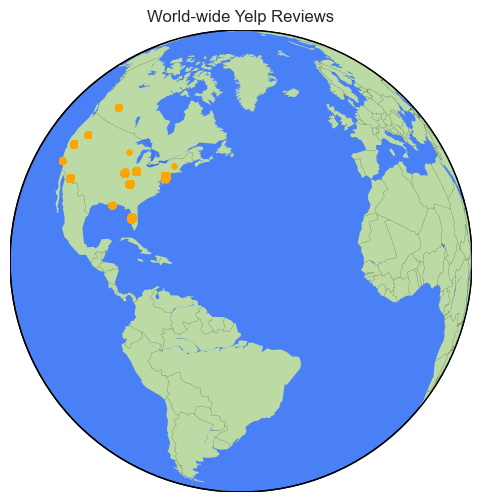

In [6]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5')
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()

Text(0.5, 1.0, 'North America Region')

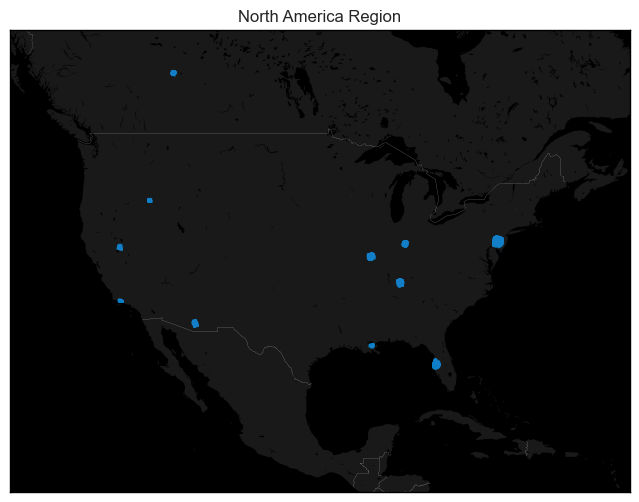

In [7]:
# Sample it down to only the North America region
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (business["longitude"]>lon_min) & \
         (business["longitude"]<lon_max) & \
         (business["latitude"]>lat_min) & \
         (business["latitude"]<lat_max)
#apply the selector to subset
NA_business=business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")

In [8]:
business.categories = business.categories.fillna(" ")
business.categories.isnull().sum()

0

In [9]:
#Check Duplicates
business.business_id.describe()

count                     150346
unique                    150346
top       Pns2l4eNsfO8kk83dixA6A
freq                           1
Name: business_id, dtype: object

In [10]:
business_overall = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

Categories  Count
0              Restaurants  52268
1                     Food  27781
2                 Shopping  24395
3            Home Services  14356
4            Beauty & Spas  14292
...                    ...    ...
1307            Patent Law      1
1308                Hainan      1
1309  Housing Cooperatives      1
1310             Guamanian      1
1311           Trade Fairs      1

[1312 rows x 2 columns]

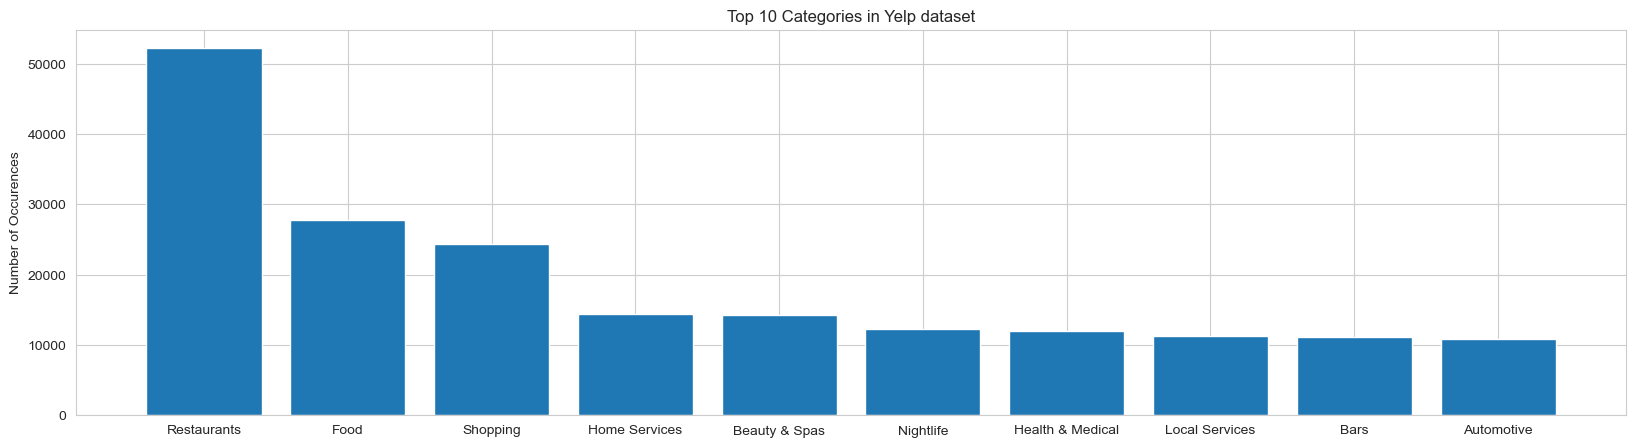

In [11]:
cat= cat.sort_values(by = 'Count', ascending = False)

cat = cat[0:10]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Categories in Yelp dataset')
plt.show()

In [12]:
# creating a dataframe to store all the records which has 'Restaurants' or 'Food' in their categories column
restaurant = pd.DataFrame()
for i in business.index:
    if 'Restaurants' in business.categories[i]:
        restaurant = restaurant.append(business.iloc[i])

In [13]:
# Taking into the consideration the restaurants which are open
# 1 = open, 0 = closed
restaurant = restaurant[restaurant['is_open']==1]

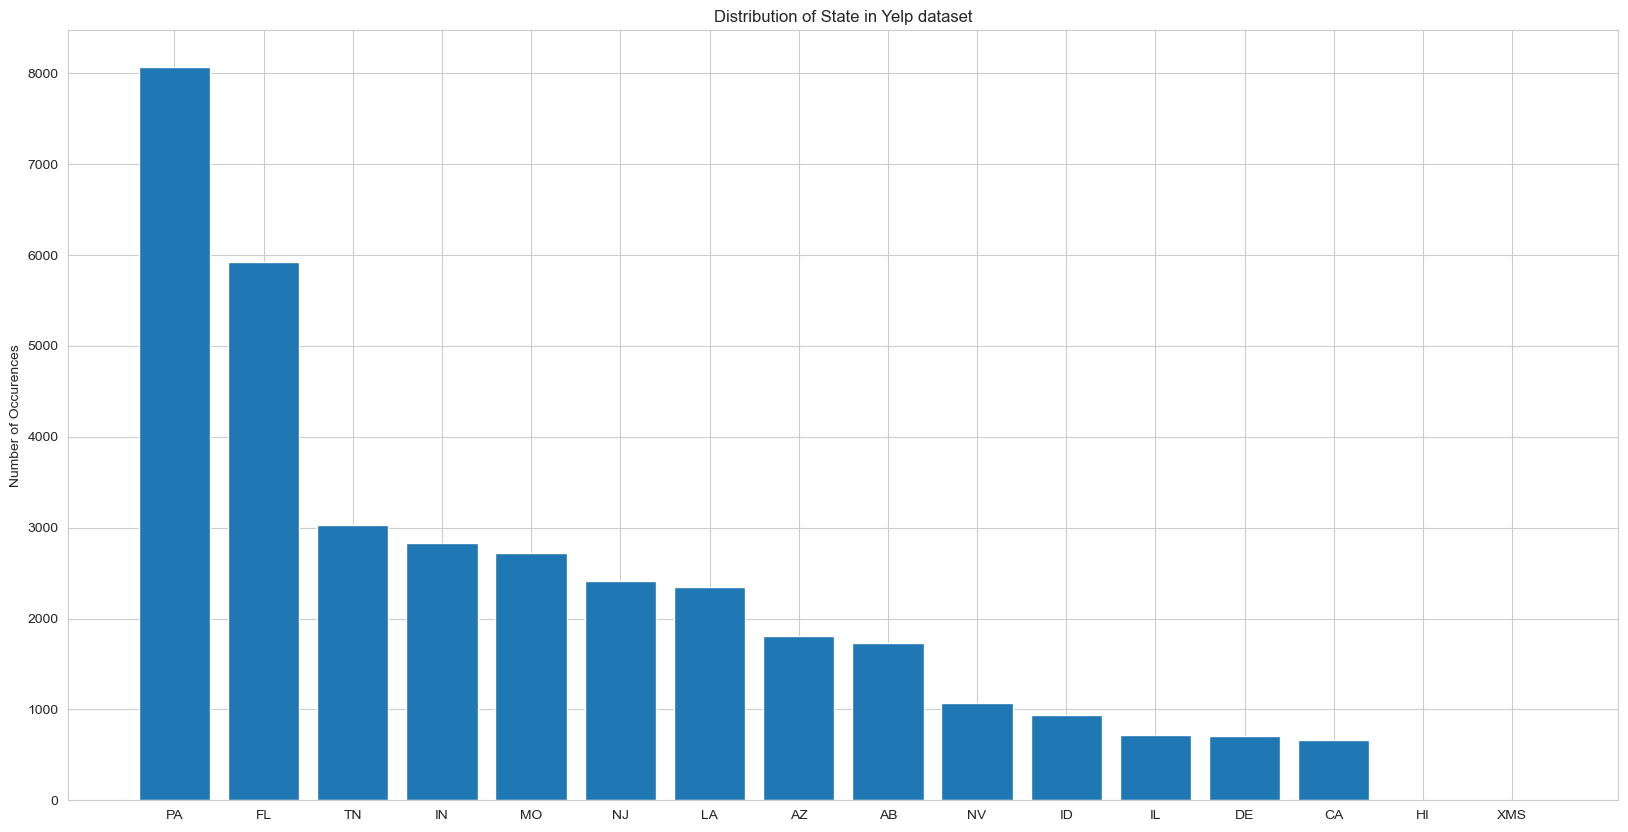

In [14]:
#Distribution of state in this dataset
state_count = restaurant.state.value_counts()
state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']
objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of State in Yelp dataset')
plt.show()

In [15]:
states = pd.Series(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
                    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
                    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
                    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
                    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])
avg_stars = pd.pivot_table(restaurant[restaurant['state'].isin(states)] , index = ['state'],
                           values = ['stars'], aggfunc = np.mean)

avg_stars=avg_stars.sort_values('stars',ascending=False)

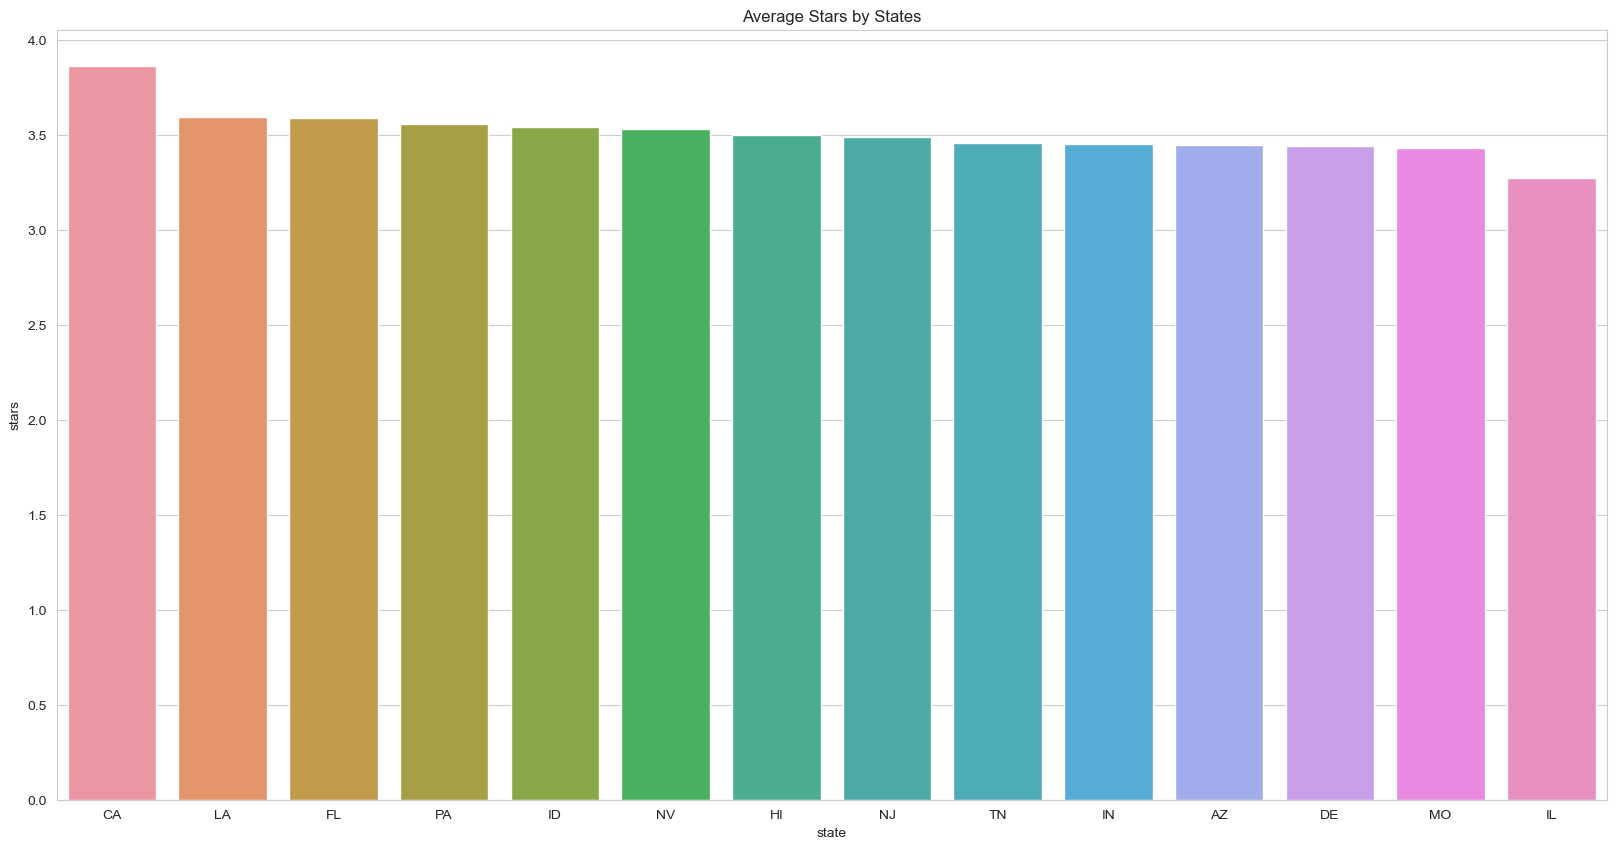

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
a = sns.barplot(x=avg_stars.index, y="stars", data=avg_stars)
# Add a title to the plot
ax.set_title("Average Stars by States")

plt.show()

In [17]:
business_in_AZ = restaurant[restaurant.state == 'AZ']
business_in_AZ = business_in_AZ.reset_index(drop = True)
business_in_AZ.head()

business_id                       name  \
0  anLQj9AM8vjbcLSIE0iUgg              Papa Murphy's   
1  9C2rpb56aQvW0ViZHK9sPw      Home Plate Sports Pub   
2  Y6heWJJ9AmEL58fZwgi9YQ             Rosati's Pizza   
3  f82dhKNiUXsDVPMLqKYiIQ              Sher-e-Punjab   
4  D7z_V6E8cxXghSRcHAmUPg  La Bella China Restaurant   

                           address    city state postal_code   latitude  \
0  7250 North La Cholla, Suite 186  Tucson    AZ       85741  32.338572   
1                   4880 E 22nd St  Tucson    AZ       85711  32.206315   
2                    2944 W Ina Rd  Tucson    AZ       85741  32.338724   
3                853 East Grant Rd  Tucson    AZ       85719  32.250960   
4                  5680 S 12th Ave  Tucson    AZ       85706  32.149473   

    longitude  stars  review_count  is_open  \
0 -111.010760    4.0            22        1   
1 -110.887843    3.5            56        1   
2 -111.030310    4.0            58        1   
3 -110.959158    4.0           446        1   
4 -110.978186    4.0            92        1   

                                          attributes  \
0  {'OutdoorSeating': 'False', 'Alcohol': 'u'none...   
1  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...   
2  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   
3  {'RestaurantsAttire': ''casual'', 'BusinessAcc...   
4  {'GoodForKids': 'True', 'BusinessAcceptsCredit...   

                                          categories  \
0                                 Pizza, Restaurants   
1          Bars, Restaurants, Sports Bars, Nightlife   
2  Sports Bars, Bars, Nightlife, Italian, Restaur...   
3  Restaurants, Salad, Pakistani, Indian, Cocktai...   
4                               Restaurants, Chinese   

                                               hours  
0                                               None  
1  {'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...  
2  {'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ...  
3  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  
4  {'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1...

In [18]:
## Checking for inconsistent Data
cities = business_in_AZ['city'].unique()
cities

array(['Tucson', 'Marana', 'Green Valley', 'Sahuarita', 'Vail',
       'Oro Valley', 'TUCSON', 'Mount Lemmon', 'Valencia West',
       'Catalina', 'Tuscon', 'South Tucson', 'Picture Rocks',
       'Corona De Tucson', 'Corona de Tucson'], dtype=object)

In [19]:
# Define a dictionary of incorrect to correct word mappings
word_mapping = {
    'TUCSON': 'Tucson',
    'Tuscon': 'Tucson',
    'South Tucson': 'Tucson',
    'Corona de Tucson': 'Tucson',
    'Corona De Tucson': 'Tucson'
}
# Function to replace incorrect words with correct ones
def replace_words(text):
    return word_mapping.get(text, text)
# Apply the function to the specified column
business_in_AZ['city'] = business_in_AZ['city'].apply(replace_words)

In [20]:
fig = px.scatter_mapbox(business_in_AZ, lat="latitude", lon="longitude", hover_name="city", color_discrete_sequence=["fuchsia"], zoom=8, height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

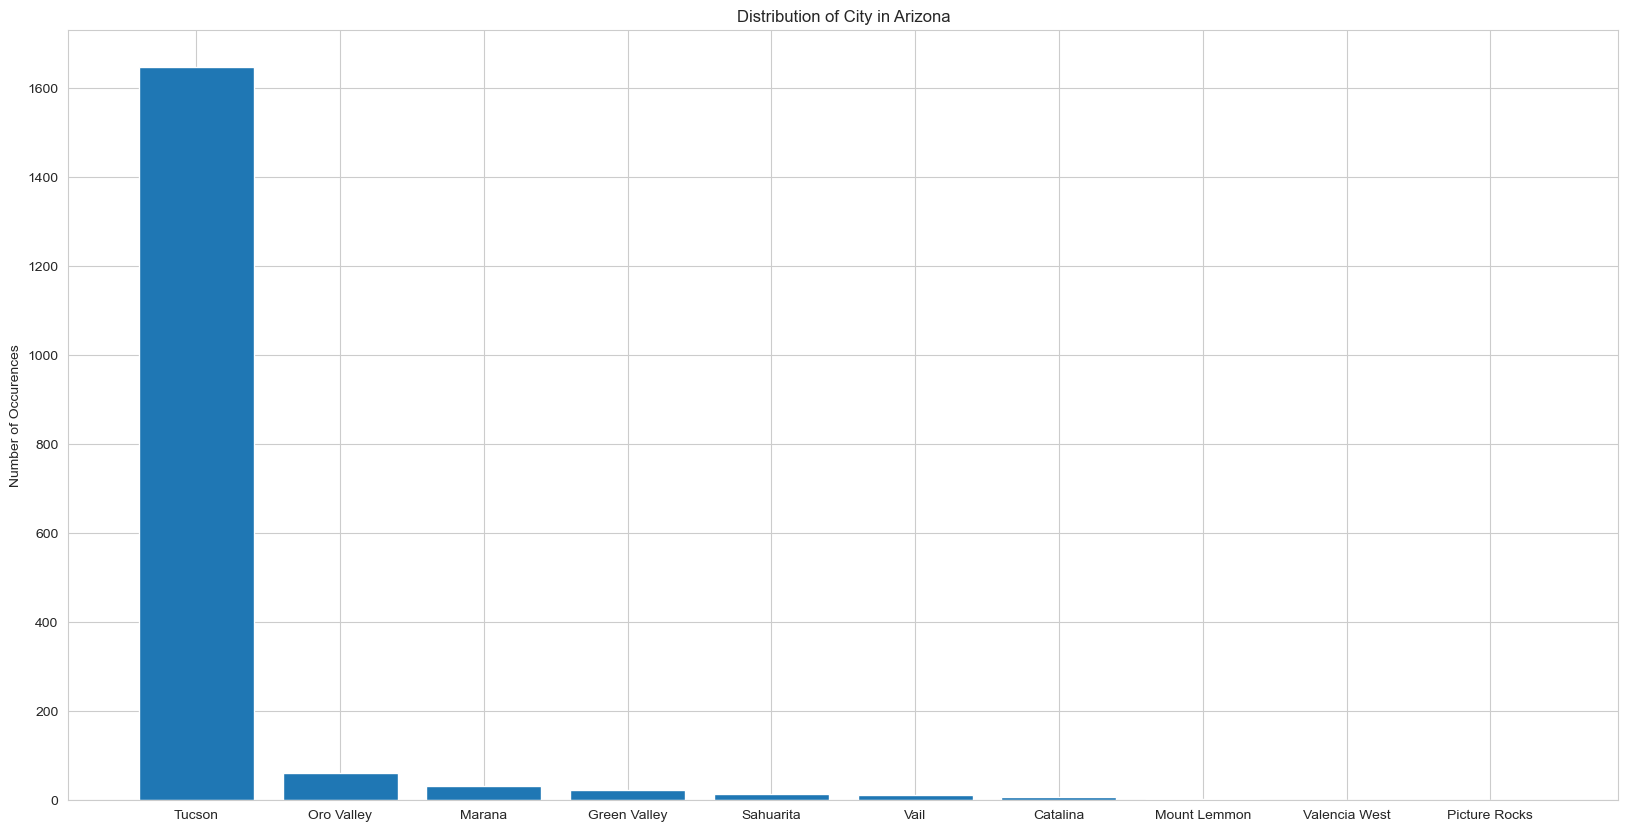

In [21]:
#Distribution of state in this dataset
city_count = business_in_AZ.city.value_counts()
city_count = city_count.to_frame().reset_index()
city_count.columns = ['city', 'Counts']
objects = list(city_count.city)
y_pos = np.arange(len(objects))
Numbers = list(city_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of City in Arizona')
plt.show()

In [22]:
business_in_TC = business_in_AZ[business_in_AZ.city == 'Tucson']
business_in_TC = business_in_TC.reset_index(drop = True)
business_in_TC.head()

business_id                       name  \
0  anLQj9AM8vjbcLSIE0iUgg              Papa Murphy's   
1  9C2rpb56aQvW0ViZHK9sPw      Home Plate Sports Pub   
2  Y6heWJJ9AmEL58fZwgi9YQ             Rosati's Pizza   
3  f82dhKNiUXsDVPMLqKYiIQ              Sher-e-Punjab   
4  D7z_V6E8cxXghSRcHAmUPg  La Bella China Restaurant   

                           address    city state postal_code   latitude  \
0  7250 North La Cholla, Suite 186  Tucson    AZ       85741  32.338572   
1                   4880 E 22nd St  Tucson    AZ       85711  32.206315   
2                    2944 W Ina Rd  Tucson    AZ       85741  32.338724   
3                853 East Grant Rd  Tucson    AZ       85719  32.250960   
4                  5680 S 12th Ave  Tucson    AZ       85706  32.149473   

    longitude  stars  review_count  is_open  \
0 -111.010760    4.0            22        1   
1 -110.887843    3.5            56        1   
2 -111.030310    4.0            58        1   
3 -110.959158    4.0           446        1   
4 -110.978186    4.0            92        1   

                                          attributes  \
0  {'OutdoorSeating': 'False', 'Alcohol': 'u'none...   
1  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...   
2  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   
3  {'RestaurantsAttire': ''casual'', 'BusinessAcc...   
4  {'GoodForKids': 'True', 'BusinessAcceptsCredit...   

                                          categories  \
0                                 Pizza, Restaurants   
1          Bars, Restaurants, Sports Bars, Nightlife   
2  Sports Bars, Bars, Nightlife, Italian, Restaur...   
3  Restaurants, Salad, Pakistani, Indian, Cocktai...   
4                               Restaurants, Chinese   

                                               hours  
0                                               None  
1  {'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...  
2  {'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ...  
3  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  
4  {'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1...

In [23]:
# Filter for businesses in Tucson
tucson_buzz = business[business.city.str.contains('Tucson', regex=True) == True].copy(deep=True)
tucson_buzz.reset_index(drop=True, inplace=True)

# Fix naming convention
tucson_buzz['city'] = 'Tucson'

# Filter for restaurants
tucson_restaurants = tucson_buzz[tucson_buzz.categories.str.contains('Restaurants|Restaurant', regex=True) == True].copy(deep=True)

In [25]:
# Filter for restaurants with reviews
tucson = tucson_restaurants[tucson_restaurants.review_count >= 150].copy(deep=True)
tucson.reset_index(drop=True, inplace=True)

## 2.0 Exploratory Data Analysis: Review

In [26]:
review = pd.read_json('datasets/yelp_academic_dataset_review.json', lines=True)

In [27]:
review.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03  
4  Cute interior and owner (?) gave us tour of up... 2017-01-14 20:54:15

In [37]:
# Shape of the dataset
print("Shape of the dataset:")
print(review.shape)

Shape of the dataset:
(6990280, 9)


In [38]:
# Column names
print("Column names:")
print(review.columns)

Column names:
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


In [39]:
# Datatype of each column
print("Datatype of each column:")
print(review.dtypes)

Datatype of each column:
review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object


In [40]:
business_ratings = pd.merge(tucson, review, on = 'business_id', how = 'left')

In [41]:
business_ratings.head()

business_id           name            address    city state  \
0  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
1  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
2  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
3  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
4  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   

  postal_code  latitude   longitude  stars_x  review_count  ...  \
0       85719  32.25096 -110.959158      4.0           446  ...   
1       85719  32.25096 -110.959158      4.0           446  ...   
2       85719  32.25096 -110.959158      4.0           446  ...   
3       85719  32.25096 -110.959158      4.0           446  ...   
4       85719  32.25096 -110.959158      4.0           446  ...   

                                          categories  \
0  Restaurants, Salad, Pakistani, Indian, Cocktai...   
1  Restaurants, Salad, Pakistani, Indian, Cocktai...   
2  Restaurants, Salad, Pakistani, Indian, Cocktai...   
3  Restaurants, Salad, Pakistani, Indian, Cocktai...   
4  Restaurants, Salad, Pakistani, Indian, Cocktai...   

                                               hours               review_id  \
0  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  xnA_bGa4zJ7fLUPTOCT0-A   
1  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  453I3aMT_YCQW655gKkzdQ   
2  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  QTE44bHheG6ugQU4em4SdQ   
3  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  5f42pKbzLJWwtsa0StDwgA   
4  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  -vIuycScTA7SVwHDi1ENeg   

                  user_id stars_y useful  funny  cool  \
0  nabJKapjKahYfTtnBDG6JQ       4      1      0     0   
1  SmaAK6il7pyldoqZrH7iTA       4      0      0     1   
2  B6FbaEEn5Uh4kEqv4kUdgA       3      0      0     0   
3  OqTs0lHg5ZXvF1S0bJfzFA       5      0      0     0   
4  QaBNIUwzgN4v_5wjmlJOCg       4      3      1     1   

                                                text                date  
0  One of my most favorite Indian restaurants. No... 2011-04-22 02:02:10  
1  Food= Amazing\nService= Great\nPrices= Reasona... 2014-04-20 00:32:54  
2  OK lunch buffet, but too oily.  i think weeken... 2005-03-12 03:47:06  
3  Favorite indian place in Tucson, hands down! M... 2013-01-28 02:55:30  
4  I'm torn between 3 and 4 stars, but have decid... 2011-02-14 18:01:48  

[5 rows x 22 columns]

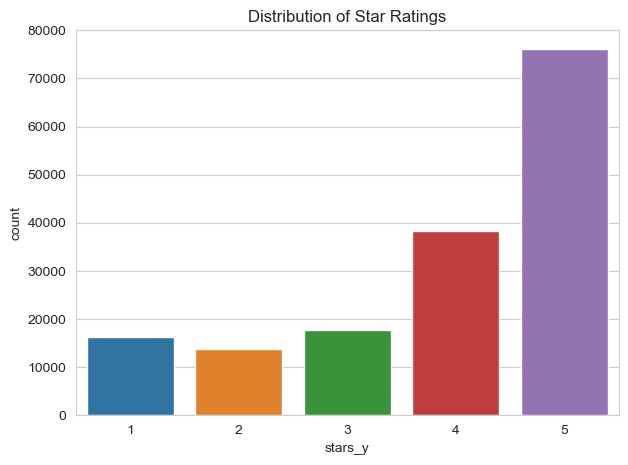

In [42]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = 'stars_y', data = business_ratings)
# Add a title to the plot
ax.set_title("Distribution of Star Ratings")

plt.show()

In [43]:
#Check which all Restaurants got 5-star ratings and how much
Five_star = business_ratings[business_ratings['stars_y'] == 5.0]
Five_star_order = Five_star.name.value_counts()
Five_star_order = Five_star_order.to_frame().reset_index()
Five_star_order.columns = ['name', 'Counts']
Five_star_order = Five_star_order.head(10)
Five_star_order = Five_star_order.sort_values(['Counts'], ascending = True)
Five_star_order

name  Counts
9                Seis Kitchen     640
8                    Tumerico     659
7  Guadalajara Original Grill     670
6              Cafe Poca Cosa     687
5             El Guero Canelo     722
4                  The Parish     765
3              El Charro Cafe     773
2                   Baja Cafe     864
1             Serial Grillers     892
0               Prep & Pastry    1443

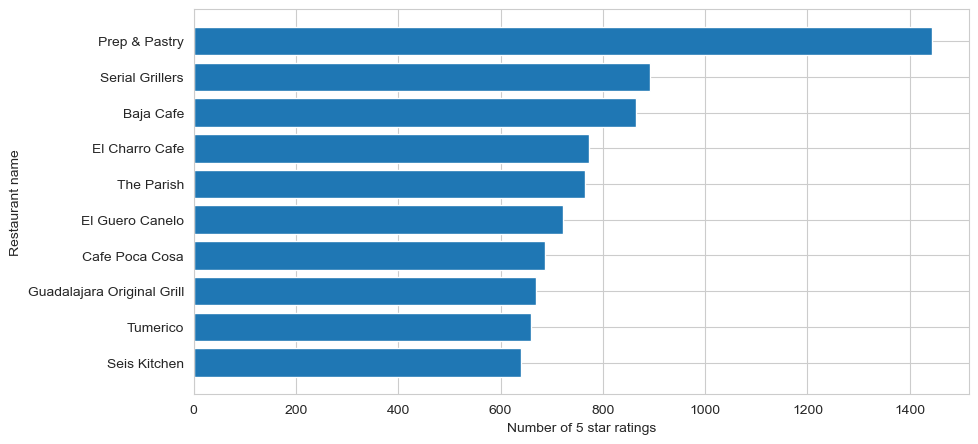

In [44]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
plt.barh(Five_star_order.name, Five_star_order.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Number of 5 star ratings')
plt.show()

In [45]:
Cust = []
for i in business_ratings['stars_y']:
    if (i == 1):
        Cust.append('BAD')
    elif (i == 3) | (i == 2):
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')


business_ratings['customer_exp'] = Cust
business_ratings['customer_exp'].value_counts()
business_ratings.head()

business_id           name            address    city state  \
0  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
1  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
2  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
3  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
4  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   

  postal_code  latitude   longitude  stars_x  review_count  ...  \
0       85719  32.25096 -110.959158      4.0           446  ...   
1       85719  32.25096 -110.959158      4.0           446  ...   
2       85719  32.25096 -110.959158      4.0           446  ...   
3       85719  32.25096 -110.959158      4.0           446  ...   
4       85719  32.25096 -110.959158      4.0           446  ...   

                                               hours               review_id  \
0  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  xnA_bGa4zJ7fLUPTOCT0-A   
1  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  453I3aMT_YCQW655gKkzdQ   
2  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  QTE44bHheG6ugQU4em4SdQ   
3  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  5f42pKbzLJWwtsa0StDwgA   
4  {'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...  -vIuycScTA7SVwHDi1ENeg   

                  user_id stars_y useful funny  cool  \
0  nabJKapjKahYfTtnBDG6JQ       4      1     0     0   
1  SmaAK6il7pyldoqZrH7iTA       4      0     0     1   
2  B6FbaEEn5Uh4kEqv4kUdgA       3      0     0     0   
3  OqTs0lHg5ZXvF1S0bJfzFA       5      0     0     0   
4  QaBNIUwzgN4v_5wjmlJOCg       4      3     1     1   

                                                text                date  \
0  One of my most favorite Indian restaurants. No... 2011-04-22 02:02:10   
1  Food= Amazing\nService= Great\nPrices= Reasona... 2014-04-20 00:32:54   
2  OK lunch buffet, but too oily.  i think weeken... 2005-03-12 03:47:06   
3  Favorite indian place in Tucson, hands down! M... 2013-01-28 02:55:30   
4  I'm torn between 3 and 4 stars, but have decid... 2011-02-14 18:01:48   

   customer_exp  
0          GOOD  
1          GOOD  
2       NEUTRAL  
3          GOOD  
4          GOOD  

[5 rows x 23 columns]

In [46]:
#Creating a new column in the dataset for the number of words in the review
business_ratings['length'] = business_ratings['text'].apply(len)
business_ratings.head()

business_id           name            address    city state  \
0  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
1  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
2  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
3  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   
4  f82dhKNiUXsDVPMLqKYiIQ  Sher-e-Punjab  853 East Grant Rd  Tucson    AZ   

  postal_code  latitude   longitude  stars_x  review_count  ...  \
0       85719  32.25096 -110.959158      4.0           446  ...   
1       85719  32.25096 -110.959158      4.0           446  ...   
2       85719  32.25096 -110.959158      4.0           446  ...   
3       85719  32.25096 -110.959158      4.0           446  ...   
4       85719  32.25096 -110.959158      4.0           446  ...   

                review_id                 user_id stars_y useful funny cool  \
0  xnA_bGa4zJ7fLUPTOCT0-A  nabJKapjKahYfTtnBDG6JQ       4      1     0    0   
1  453I3aMT_YCQW655gKkzdQ  SmaAK6il7pyldoqZrH7iTA       4      0     0    1   
2  QTE44bHheG6ugQU4em4SdQ  B6FbaEEn5Uh4kEqv4kUdgA       3      0     0    0   
3  5f42pKbzLJWwtsa0StDwgA  OqTs0lHg5ZXvF1S0bJfzFA       5      0     0    0   
4  -vIuycScTA7SVwHDi1ENeg  QaBNIUwzgN4v_5wjmlJOCg       4      3     1    1   

                                                text                date  \
0  One of my most favorite Indian restaurants. No... 2011-04-22 02:02:10   
1  Food= Amazing\nService= Great\nPrices= Reasona... 2014-04-20 00:32:54   
2  OK lunch buffet, but too oily.  i think weeken... 2005-03-12 03:47:06   
3  Favorite indian place in Tucson, hands down! M... 2013-01-28 02:55:30   
4  I'm torn between 3 and 4 stars, but have decid... 2011-02-14 18:01:48   

   customer_exp  length  
0          GOOD     769  
1          GOOD      79  
2       NEUTRAL      78  
3          GOOD     330  
4          GOOD    1692  

[5 rows x 24 columns]

In [47]:
print("Shape of the Restaurant review dataset :", business_ratings.shape)

Shape of the Restaurant review dataset : (162596, 24)


stars_y
1    682.610578
2    731.396466
3    675.853329
4    567.657551
5    440.882430
Name: length, dtype: float64

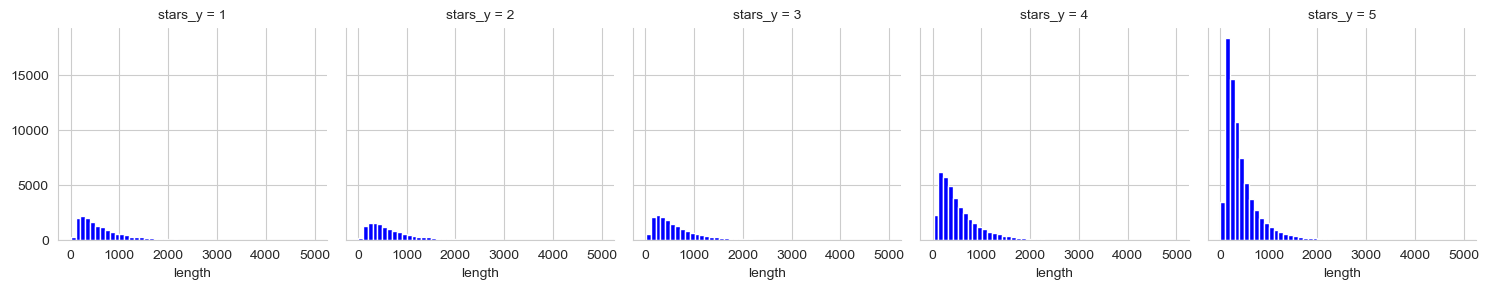

In [48]:
# Comparing text lenght of stars
graph = sns.FacetGrid(data=business_ratings,col='stars_y')
graph.map(plt.hist,'length',bins=50,color='blue')
business_ratings.groupby('stars_y').mean()['length']

<Axes: xlabel='stars_y', ylabel='length'>

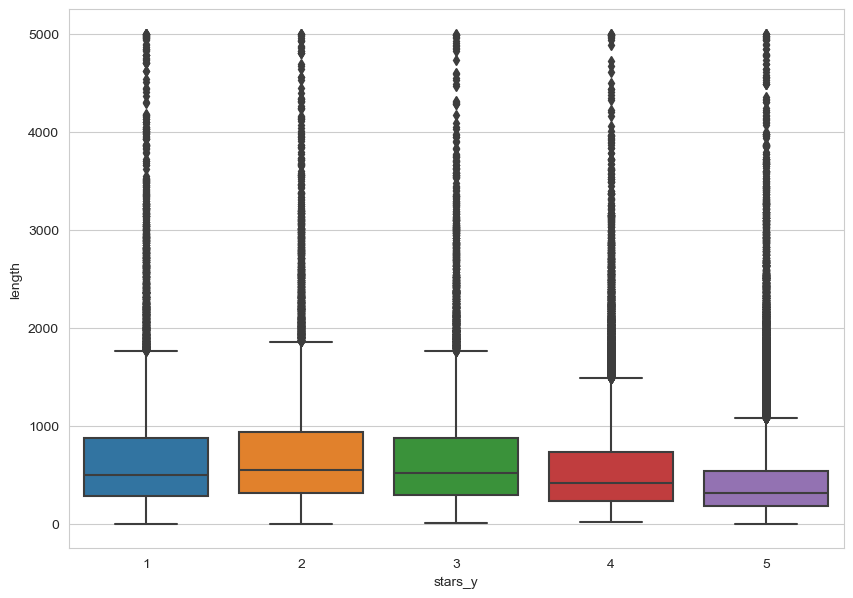

In [49]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'stars_y', y = 'length', data = business_ratings)

<Axes: xlabel='customer_exp', ylabel='count'>

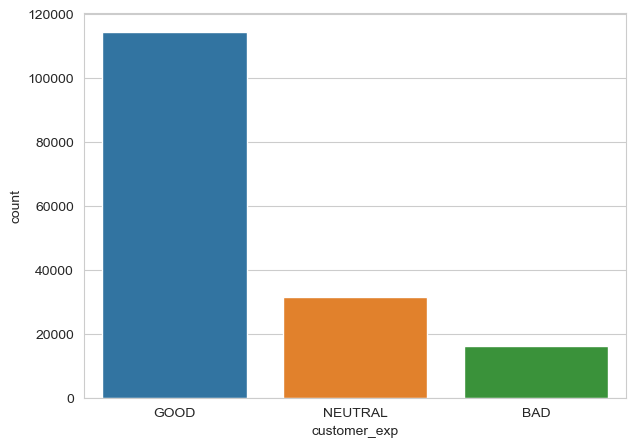

In [50]:
plt.figure(figsize = (7,5))
sns.countplot(x='customer_exp', data = business_ratings)

customer_exp
BAD        682.610578
GOOD       483.360233
NEUTRAL    700.094196
Name: length, dtype: float64

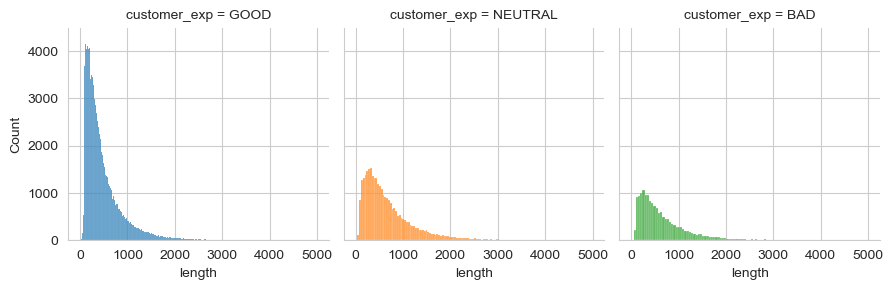

In [51]:
# Comparing text lenght of costumer experience
a = sns.FacetGrid(data = business_ratings, col = 'customer_exp', hue = 'customer_exp')
a.map(sns.histplot, "length")
business_ratings.groupby('customer_exp').mean()['length']

In [52]:
# Getting the mean values of the vote columns with respect to the stars on the review
stval = business_ratings[['stars_y','useful', 'funny','cool', 'length']].groupby('stars_y').mean()
stval

useful     funny      cool      length
stars_y                                          
1        1.759421  0.520430  0.176571  682.610578
2        1.569783  0.439632  0.217426  731.396466
3        1.055976  0.323798  0.315665  675.853329
4        0.986691  0.304553  0.578293  567.657551
5        0.872915  0.229011  0.542556  440.882430

<Axes: >

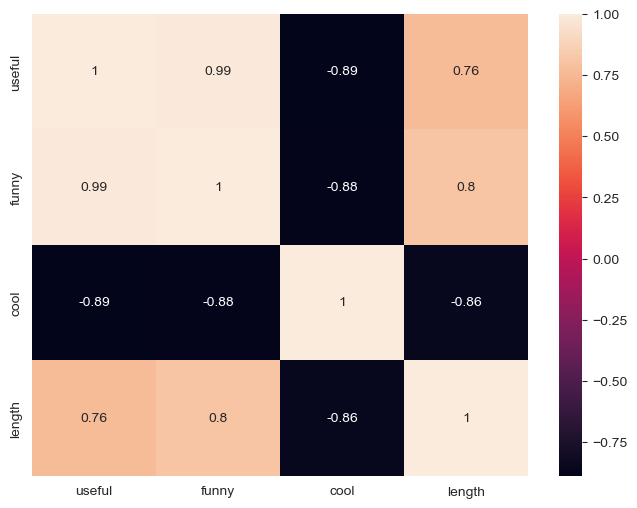

In [53]:
#Correlation between voting columns
plt.figure(figsize = (8,6))
sns.heatmap(stval.corr(), annot=True)

In [54]:
business_ratings_date = business_ratings[['date', 'stars_y']]
business_ratings_date.head()

date  stars_y
0 2011-04-22 02:02:10        4
1 2014-04-20 00:32:54        4
2 2005-03-12 03:47:06        3
3 2013-01-28 02:55:30        5
4 2011-02-14 18:01:48        4

In [55]:
# let's check the total feedback rating per year
business_ratings_date['dates'] = pd.to_datetime(business_ratings_date['date']).dt.date
business_ratings_date['dates'] = pd.DatetimeIndex(business_ratings_date['dates']).year
business_ratings_date.head()

date  stars_y  dates
0 2011-04-22 02:02:10        4   2011
1 2014-04-20 00:32:54        4   2014
2 2005-03-12 03:47:06        3   2005
3 2013-01-28 02:55:30        5   2013
4 2011-02-14 18:01:48        4   2011

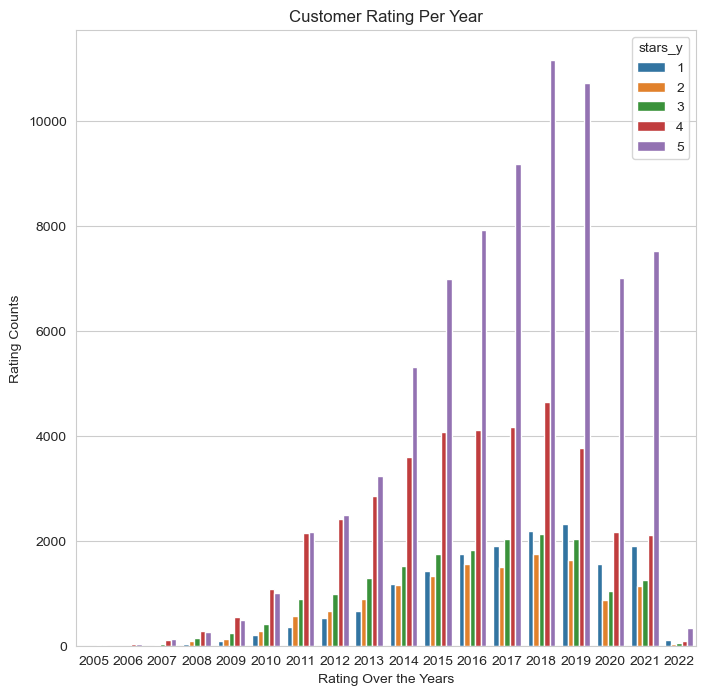

In [56]:
#Let's consider the rating performance per year
plt.figure(figsize=(8, 8))
sns.countplot(x = 'dates', hue ='stars_y', data = business_ratings_date)
plt.title('Customer Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

## 3.0 Data Preprocessing

3.1 Labelling the data

In [57]:
## This the function for labelling the data
## If the stars achieved by a restaurant is above 3 then its "Positive" review or else it is a "Negative" review
## Label 1 signifies postive reviews
## Label 0 signifies negative reviews
def target_label(data):
    target = {"Target_sentiment":[]}
    for i in data["stars_y"]:
        j = 0
        if i > 3:
            j = 1
            target["Target_sentiment"].append(j)
        else:
            target["Target_sentiment"].append(j)

    data = data.join(pd.DataFrame(target, index = data.index))
    data = data.drop('stars_y', axis = 1)
    data_sample = data.sample(n = 10000, random_state = 42)
    data_sample = data_sample.reset_index(drop = True)
    return(data_sample)

In [58]:
## Calling the above function for creating the sentiment labels
business_ratings_lb = target_label(business_ratings)

In [59]:
business_ratings_lb.head()

business_id                          name  \
0  3cyjdxvskRcADylzLI32cQ                   First Watch   
1  HpmsY3JJ4gIuS8EiVHwMJw               Agustin Kitchen   
2  9Wq455RePLf5wbp4C4noQA                JA Ramen Curry   
3  rLMRRaLhgxH2cU2XuJf_BQ                Commoner & Co.   
4  q9HeBXQBnXgThOa9DPIhAw  5 Points Market & Restaurant   

                               address    city state postal_code   latitude  \
0        5350 E Broadway Blvd, Ste 102  Tucson    AZ       85711  32.220978   
1  100 S Avenida Del Convento, Ste 150  Tucson    AZ       85745  32.219993   
2                  2643 N Campbell Ave  Tucson    AZ       85719  32.255190   
3           6960 E Sunrise Dr, Ste 110  Tucson    AZ       85750  32.308071   
4                      756 S Stone Ave  Tucson    AZ       85701  32.212200   

    longitude  stars_x  review_count  ...               review_id  \
0 -110.878600      4.0           213  ...  KpUbYfj6R1hq0x6ftfsCkw   
1 -110.985599      3.5           510  ...  rN6i5IazuGFO4K2t3CyjJA   
2 -110.944284      4.0           153  ...  9WHPTgGqE2DNGuE7CeRjJg   
3 -110.843790      4.0           482  ...  LxPxeFIptBznIqvGh_cegQ   
4 -110.969090      4.5           557  ...  Hzl55-6lGqoZB0um6DuAVg   

                  user_id useful funny cool  \
0  Cg2P0fLgwwLcFu3HQUdQbg      0     0    0   
1  0Um0BLiP05X48dUgK_Rruw      0     0    0   
2  F4dxyvL7mM9bSqD_bbII3g      0     0    0   
3  K15mvUZ8ZL5lrTq7jnRotg      0     0    0   
4  wkIFv4rKYcTJoiqp3I9L6A      0     0    1   

                                                text                date  \
0  LOVE THIS PLACE!!!! \nGreat food and atmospher... 2019-04-13 22:15:01   
1  I've been to Agustin's Kitchen 3 times, maybe ... 2021-08-08 17:11:41   
2  Sooo good! I had the ramen, they have other ch... 2020-01-24 01:09:39   
3  Absolutely wonderful restaurant! We had a smal... 2015-10-21 14:41:37   
4  I brought my mother here for breakfast since w... 2017-07-23 20:44:26   

   customer_exp  length Target_sentiment  
0          GOOD      88                1  
1       NEUTRAL    1439                0  
2          GOOD     120                1  
3          GOOD     338                1  
4          GOOD    1214                1  

[5 rows x 24 columns]

3.2 Cleaning the data

In [60]:
## Function for replacing contractions with normal words
def contractions(sent):
    sent = re.sub(r"ain't", "am not", sent)
    sent = re.sub(r"aren't", "are not", sent)
    sent = re.sub(r"can't", "can not", sent)
    sent = re.sub(r"can't've", "can not have", sent)
    sent = re.sub(r"'cause", "because", sent)
    sent = re.sub(r"could've", "could have", sent)
    sent = re.sub(r"couldn't", "could not", sent)
    sent = re.sub(r"couldn't've", "could not have", sent)
    sent = re.sub(r"doesn't", "does not", sent)
    sent = re.sub(r"hadn't", "had not", sent)
    sent = re.sub(r"hadn't've", "had not have", sent)
    sent = re.sub(r"hasn't", "has not", sent)
    sent = re.sub(r"haven't", "have not", sent)
    sent = re.sub(r"he'd", "he had", sent)
    sent = re.sub(r"he'd've", "he would have", sent)
    sent = re.sub(r"he'll", "he will", sent)
    sent = re.sub(r"he'll've", "he will have", sent)
    sent = re.sub(r"he's", "he has", sent)
    sent = re.sub(r"how'd", "how did", sent)
    sent = re.sub(r"how'd'y", "how do you", sent)
    sent = re.sub(r"how'll", "how will", sent)
    sent = re.sub(r"how's", "how has", sent)
    sent = re.sub(r"i'd", "i had", sent)
    sent = re.sub(r"i'd've", "i would have", sent)
    sent = re.sub(r"i'll", "i shall", sent)
    sent = re.sub(r"i'll've", "i shall have", sent)
    sent = re.sub(r"i'm", "i am", sent)
    sent = re.sub(r"i've", "i have", sent)
    sent = re.sub(r"isn't", "is not", sent)
    sent = re.sub(r"it'd", "it had", sent)
    sent = re.sub(r"it'd've", "it would have", sent)
    sent = re.sub(r"it'll", "it shall", sent)
    sent = re.sub(r"it'll've", "it shall have", sent)
    sent = re.sub(r"it's", "it has", sent)
    sent = re.sub(r"let's", "let us", sent)
    sent = re.sub(r"ma'am", "madam", sent)
    sent = re.sub(r"mayn't", "may not", sent)
    sent = re.sub(r"might've", "might have", sent)
    sent = re.sub(r"mightn't", "might not", sent)
    sent = re.sub(r"mightn't've", "might not have", sent)
    sent = re.sub(r"must've", "must have", sent)
    sent = re.sub(r"mustn't", "must not", sent)
    sent = re.sub(r"mustn't've", "must not have", sent)
    sent = re.sub(r"needn't", "need not", sent)
    sent = re.sub(r"needn't've", "need not have", sent)
    sent = re.sub(r"o'clock", "of the clock", sent)
    sent = re.sub(r"oughtn't", "ought not", sent)
    sent = re.sub(r"oughtn't've", "ought not have", sent)
    sent = re.sub(r"shan't", "shall not", sent)
    sent = re.sub(r"sha'n't", "shall not", sent)
    sent = re.sub(r"shan't've", "shall not have", sent)
    sent = re.sub(r"she'd", "she had", sent)
    sent = re.sub(r"she'd've", "she would have", sent)
    sent = re.sub(r"she'll", "she shall", sent)
    sent = re.sub(r"she'll've", "she shall have", sent)
    sent = re.sub(r"she's", "she has", sent)
    sent = re.sub(r"should've", "should have", sent)
    sent = re.sub(r"shouldn't", "should not", sent)
    sent = re.sub(r"shouldn't've", "should not have", sent)
    sent = re.sub(r"so've", "so have", sent)
    sent = re.sub(r"so's", "so as", sent)
    sent = re.sub(r"that'd", "that would", sent)
    sent = re.sub(r"that'd've", "that would have", sent)
    sent = re.sub(r"that's", "that has", sent)
    sent = re.sub(r"there'd", "there had", sent)
    sent = re.sub(r"there'd've", "there would have", sent)
    sent = re.sub(r"there's", "there has", sent)
    sent = re.sub(r"they'd", "they had", sent)
    sent = re.sub(r"they'd've", "they would have", sent)
    sent = re.sub(r"they'll", "they shall", sent)
    sent = re.sub(r"they'll've", "they shall have", sent)
    sent = re.sub(r"they're", "they are", sent)
    sent = re.sub(r"they've", "they have", sent)
    sent = re.sub(r"to've", "to have", sent)
    sent = re.sub(r"wasn't", "was not", sent)
    sent = re.sub(r"we'd", "we had", sent)
    sent = re.sub(r"we'd've", "we would have", sent)
    sent = re.sub(r"we'll", "we will", sent)
    sent = re.sub(r"we'll've", "we will have", sent)
    sent = re.sub(r"we're", "we are", sent)
    sent = re.sub(r"we've", "we have", sent)
    sent = re.sub(r"weren't", "were not", sent)
    sent = re.sub(r"what'll", "what shall", sent)
    sent = re.sub(r"what'll've", "what shall have", sent)
    sent = re.sub(r"what're", "what are", sent)
    sent = re.sub(r"what's", "what has", sent)
    sent = re.sub(r"what've", "what have", sent)
    sent = re.sub(r"when's", "when has", sent)
    sent = re.sub(r"when've", "when have", sent)
    sent = re.sub(r"where'd", "where did", sent)
    sent = re.sub(r"where's", "where has", sent)
    sent = re.sub(r"where've", "where have", sent)
    sent = re.sub(r"who'll", "who shall", sent)
    sent = re.sub(r"who'll've", "who shall have", sent)
    sent = re.sub(r"who's", "who has", sent)
    sent = re.sub(r"who've", "who have", sent)
    sent = re.sub(r"why's", "why has", sent)
    sent = re.sub(r"why've", "why have", sent)
    sent = re.sub(r"will've", "will have", sent)
    sent = re.sub(r"won't", "will not", sent)
    sent = re.sub(r"won't've", "will not have", sent)
    sent = re.sub(r"would've", "would have", sent)
    sent = re.sub(r"wouldn't", "would not", sent)
    sent = re.sub(r"wouldn't've", "would not have", sent)
    sent = re.sub(r"y'all", "you all", sent)
    sent = re.sub(r"y'all'd", "you all would", sent)
    sent = re.sub(r"y'all'd've", "you all would have", sent)
    sent = re.sub(r"y'all're", "you all are", sent)
    sent = re.sub(r"y'all've", "you all have", sent)
    sent = re.sub(r"you'd", "you had", sent)
    sent = re.sub(r"you'd've", "you would have", sent)
    sent = re.sub(r"you'll", "you shall", sent)
    sent = re.sub(r"you'll've", "you shall have", sent)
    sent = re.sub(r"how's", "how has", sent)
    sent = re.sub(r"you're", "you are", sent)
    sent = re.sub(r"you've", "you have", sent)
    sent = re.sub(r"didn't", "did not", sent)
    sent = re.sub(r"don't", "do not", sent)
    sent = re.sub(r"'","",sent)
    sent = re.sub(r". . .","",sent)
    return(sent)

In [61]:
## Function for removing unwanted text
def processing(data_1):

    for index, row in tqdm(data_1.iterrows()):
        stri = ""
        ## Code to remove digit with word pattern
        cle = re.sub(r'([\d]+[a-zA-Z]+)|([a-zA-Z]+[\d]+)', "", row["text"])
        ## Code to remove only digit patter
        cle = re.sub(r"(^|\s)(\-?\d+(?:\.\d)*|\d+|[\d]+[A-Za-z]+)"," ", cle.lower())
        ## Code to remove every symbols except characters
        cle = re.sub('[^A-Za-z\']+', " ", cle)
        ## Code for concatinating strings
        stri = stri + cle
        ## Code for calling contraction function
        stri = contractions(stri)
        data_1["text"][index] = stri
    return(data_1)

In [62]:
## Function for stopwords removal and lemitizing the word
def lema_stopw(data_l):
    var2 = copy.deepcopy(data_l)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) - set(['no', 'not'])
    for index, row in tqdm(var2.iterrows()):
        sent = ''
        for e in row["text"].split():
            if e not in stop_words:
                e = lemmatizer.lemmatize(e, pos ="a")
                sent = ' '.join([sent,e])
        var2["text"][index] = sent
    return(var2)

In [63]:
## Calling the above function "preprocessing" to clean the text
business_ratings_lb1 = processing(business_ratings_lb)
business_ratings_lb1.head()

10000it [00:05, 1984.29it/s]


business_id                          name  \
0  3cyjdxvskRcADylzLI32cQ                   First Watch   
1  HpmsY3JJ4gIuS8EiVHwMJw               Agustin Kitchen   
2  9Wq455RePLf5wbp4C4noQA                JA Ramen Curry   
3  rLMRRaLhgxH2cU2XuJf_BQ                Commoner & Co.   
4  q9HeBXQBnXgThOa9DPIhAw  5 Points Market & Restaurant   

                               address    city state postal_code   latitude  \
0        5350 E Broadway Blvd, Ste 102  Tucson    AZ       85711  32.220978   
1  100 S Avenida Del Convento, Ste 150  Tucson    AZ       85745  32.219993   
2                  2643 N Campbell Ave  Tucson    AZ       85719  32.255190   
3           6960 E Sunrise Dr, Ste 110  Tucson    AZ       85750  32.308071   
4                      756 S Stone Ave  Tucson    AZ       85701  32.212200   

    longitude  stars_x  review_count  ...               review_id  \
0 -110.878600      4.0           213  ...  KpUbYfj6R1hq0x6ftfsCkw   
1 -110.985599      3.5           510  ...  rN6i5IazuGFO4K2t3CyjJA   
2 -110.944284      4.0           153  ...  9WHPTgGqE2DNGuE7CeRjJg   
3 -110.843790      4.0           482  ...  LxPxeFIptBznIqvGh_cegQ   
4 -110.969090      4.5           557  ...  Hzl55-6lGqoZB0um6DuAVg   

                  user_id useful funny cool  \
0  Cg2P0fLgwwLcFu3HQUdQbg      0     0    0   
1  0Um0BLiP05X48dUgK_Rruw      0     0    0   
2  F4dxyvL7mM9bSqD_bbII3g      0     0    0   
3  K15mvUZ8ZL5lrTq7jnRotg      0     0    0   
4  wkIFv4rKYcTJoiqp3I9L6A      0     0    1   

                                                text                date  \
0  love this place great food and atmosphere the ... 2019-04-13 22:15:01   
1  i have been to agustins kitchen times maybe th... 2021-08-08 17:11:41   
2  sooo gooad the ramen they have other choices h... 2020-01-24 01:09:39   
3  absolutely wonderful restaurant we hamall baby... 2015-10-21 14:41:37   
4  i brought my mother here for breakfast since w... 2017-07-23 20:44:26   

   customer_exp  length Target_sentiment  
0          GOOD      88                1  
1       NEUTRAL    1439                0  
2          GOOD     120                1  
3          GOOD     338                1  
4          GOOD    1214                1  

[5 rows x 24 columns]

In [64]:
## Calling the above function "lema_stopw" to lemmatize the words and to remove the stopwords
business_ratings_lb2 = lema_stopw(business_ratings_lb1)
business_ratings_lb2.head(2)

10000it [00:05, 1967.21it/s]


business_id             name  \
0  3cyjdxvskRcADylzLI32cQ      First Watch   
1  HpmsY3JJ4gIuS8EiVHwMJw  Agustin Kitchen   

                               address    city state postal_code   latitude  \
0        5350 E Broadway Blvd, Ste 102  Tucson    AZ       85711  32.220978   
1  100 S Avenida Del Convento, Ste 150  Tucson    AZ       85745  32.219993   

    longitude  stars_x  review_count  ...               review_id  \
0 -110.878600      4.0           213  ...  KpUbYfj6R1hq0x6ftfsCkw   
1 -110.985599      3.5           510  ...  rN6i5IazuGFO4K2t3CyjJA   

                  user_id useful funny cool  \
0  Cg2P0fLgwwLcFu3HQUdQbg      0     0    0   
1  0Um0BLiP05X48dUgK_Rruw      0     0    0   

                                                text                date  \
0   love place great food atmosphere fresh juice ... 2019-04-13 22:15:01   
1   agustins kitchen times maybe notable trip boy... 2021-08-08 17:11:41   

   customer_exp  length Target_sentiment  
0          GOOD      88                1  
1       NEUTRAL    1439                0  

[2 rows x 24 columns]

3.3 Feature Engineering

In [65]:
x = business_ratings_lb2['text']
# Vectorize a single review and see the results
vocab = CountVectorizer(analyzer='word').fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names_out()[19648])
print(vocab.get_feature_names_out()[10643])

44663
 love place great food atmosphere fresh juice kale tonic best
  (0, 3257)	1
  (0, 4731)	1
  (0, 14449)	1
  (0, 15013)	1
  (0, 16767)	1
  (0, 21438)	1
  (0, 21620)	1
  (0, 23165)	1
  (0, 29566)	1
  (0, 39215)	1
Getting the words back:
iervice
disclosure


In [66]:
#Vectorization of the whole review set and checking the sparse matrix

x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)

#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# Density of the matrix
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (10000, 44663)
Non-Zero occurences:  439948
Density of the matrix =  0.09850390703714483


In [67]:
## Function for calculating "sentiment polarity", "text length", "Word Count"
def creating_visulaizationfeature(data_v):
    data_v1 = copy.deepcopy(data_v)
    ## Calculating the sentiment polarity
    data_v1["sentiment_polarity"] = data_v1["text"].map(lambda text: TextBlob(text).sentiment.polarity)

    ## Calculating the sentiment subjectivity
    data_v1["sentiment_subjectivity"] = data_v1["text"].map(lambda text: TextBlob(text).sentiment.subjectivity)

    ## Calculating the text length
    data_v1["text_length"] = data_v1["text"].astype(str).apply(len)

    ## Calculating the word count
    data_v1["Word_count"] = data_v1["text"].apply(lambda x: len(str(x).split()))

    return(data_v1)

In [68]:
## Function for plotting the count plots

def plot_countplot(data):
    sns.catplot(x="Target_sentiment", kind="count", palette="ch:.25", data= data).set(title='Bar Chart representing the distribution of Target Label (0 : Negative Reviews 1 : Postive reviews)')

## Function for plotting histograms
def plot_histogram(data,x,y,t):

    ## Plot Distribution of the reviews
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(7,5))
    plt.hist(data, bins=50, color = "tab:blue")
    ax.set_title(t)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

## Function to get unigram word frequencies of the text

def plot_wordfrequencies(text):
    word_dict = {}

    for i in text:
        for j in i.split():
            if j not in word_dict.keys():
                word_dict[j] = 1
            else:
                word_dict[j] += 1
    cd = sorted(word_dict.items(),key=operator.itemgetter(1),reverse=True)
    word_df = pd.DataFrame(cd[0:20],
                           columns=['Word', 'Frequency'])
    word_df = word_df.set_index('Word')
    return(word_df)

## Function to get Bigram word frequencies

def bigram_wordfreqplot(text1):
    # Use CountVectorizer to count bigram words
    word_vec = CountVectorizer(ngram_range=(2, 2), max_features=100)
    bigram_words_sum_axis = word_vec.fit_transform(text1)
    # Sum the bigram frequencies
    bigram_words_sum = bigram_words_sum_axis.sum(axis=0)
    # Get the feature names (bigrams)
    feature_names = word_vec.get_feature_names_out()
    # Create a list of (bigram, frequency) tuples
    freq_word = [(w, bigram_words_sum[0, k]) for k, w in enumerate(feature_names)]
    # Sort the bigram frequencies in descending order
    sort_freqword = sorted(freq_word, key=lambda x: x[1], reverse=True)
    # Create a DataFrame with the top 20 bigrams and their frequencies
    word_df1 = pd.DataFrame(sort_freqword[:20], columns=['Bigram', 'Frequency'])
    word_df1 = word_df1.set_index('Bigram')
    # Create a DataFrame with all bigram frequencies
    word_df2 = pd.DataFrame(bigram_words_sum_axis.toarray(), columns=feature_names)
    return word_df1, word_df2

##  function for plotting barcharts
def plot_barchart(data_df,x,y,z):
    jk = data_df.plot.bar(rot= 90,figsize=(20,5), color = "tab:blue", title = z, label = "Word Frequencies")
    jk.set_xlabel(x)
    jk.set_ylabel(y)


In [69]:
## Calling above function to calculate "sentiment polarity", "text length", "Word Count"
data_vi = creating_visulaizationfeature(business_ratings_lb2)

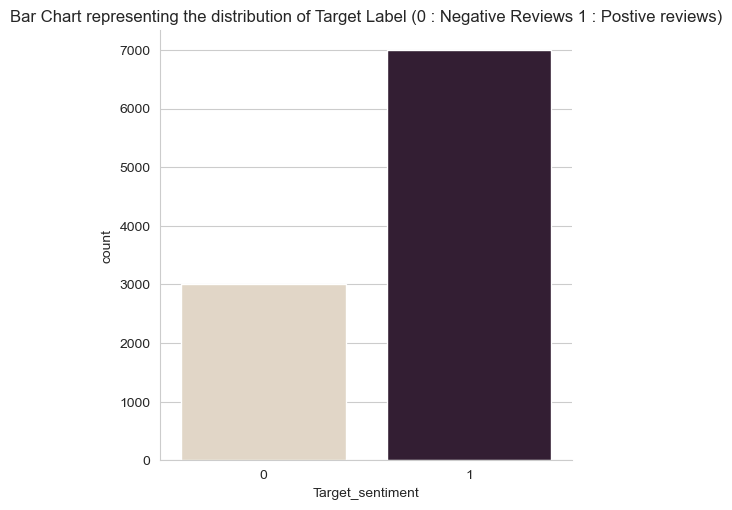

In [70]:
## Calling above function to plot the count plot of the reviews
plot_countplot(business_ratings_lb2)

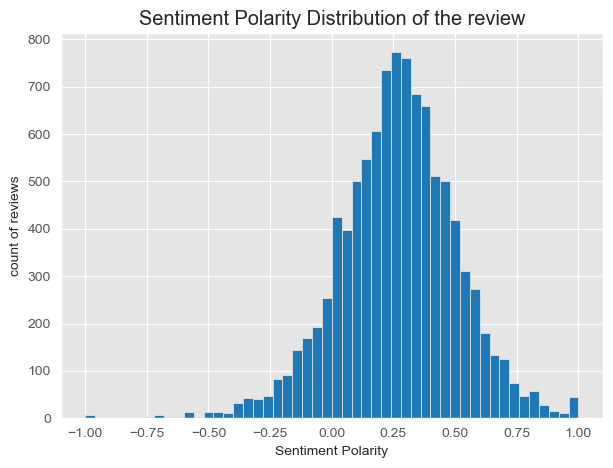

In [71]:
## Calling the above function to plot the histogram of the sentiment polarity of the reviews
plot_histogram(data_vi["sentiment_polarity"], x = "Sentiment Polarity", y = "count of reviews", t = 'Sentiment Polarity Distribution of the review')

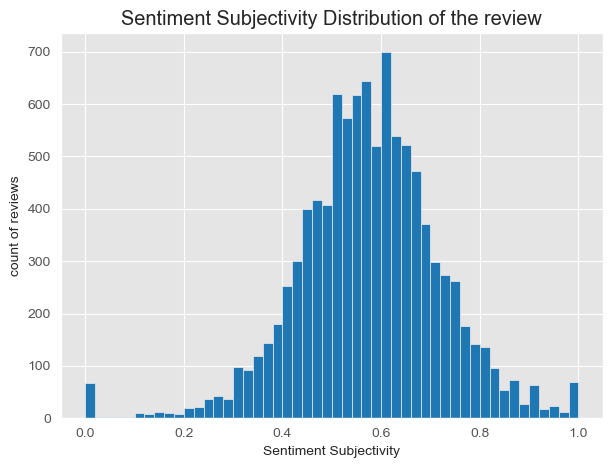

In [72]:
## Calling the above function to plot the histogram of the sentiment subjectivity of the reviews
plot_histogram(data_vi["sentiment_subjectivity"], x = "Sentiment Subjectivity", y = "count of reviews", t = 'Sentiment Subjectivity Distribution of the review')

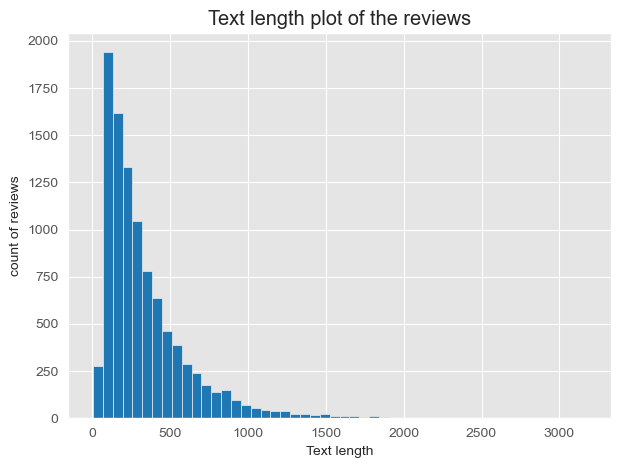

In [73]:
## Calling the above function to plot tbe text length of the reviews
plot_histogram(data_vi["text_length"], x = "Text length", y = "count of reviews", t = 'Text length plot of the reviews')

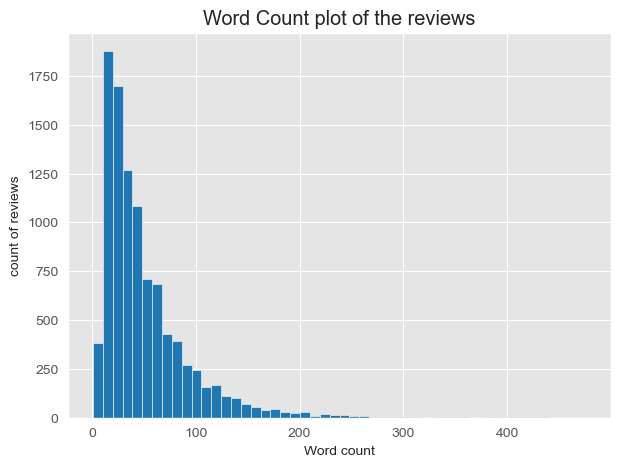

In [74]:
## Calling the above function for plotting the histogram of the word count
plot_histogram(data_vi["Word_count"], x = "Word count", y = "count of reviews", t = 'Word Count plot of the reviews')

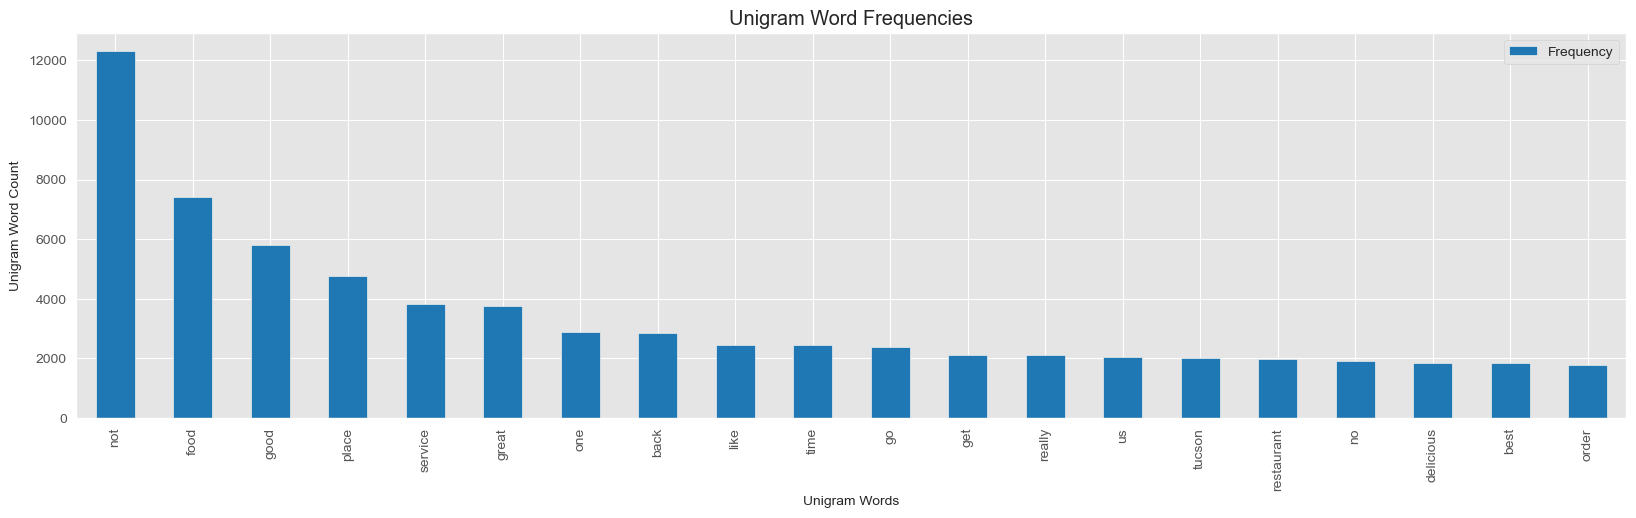

In [75]:
## Calling the above function to calculate the unigram word frequeicies of the reviews
word_df = plot_wordfrequencies(business_ratings_lb2["text"])
## Calling the above function to plot the bar plot of top unigram words of reviews
plot_barchart(word_df,x = "Unigram Words", y = "Unigram Word Count", z = "Unigram Word Frequencies")

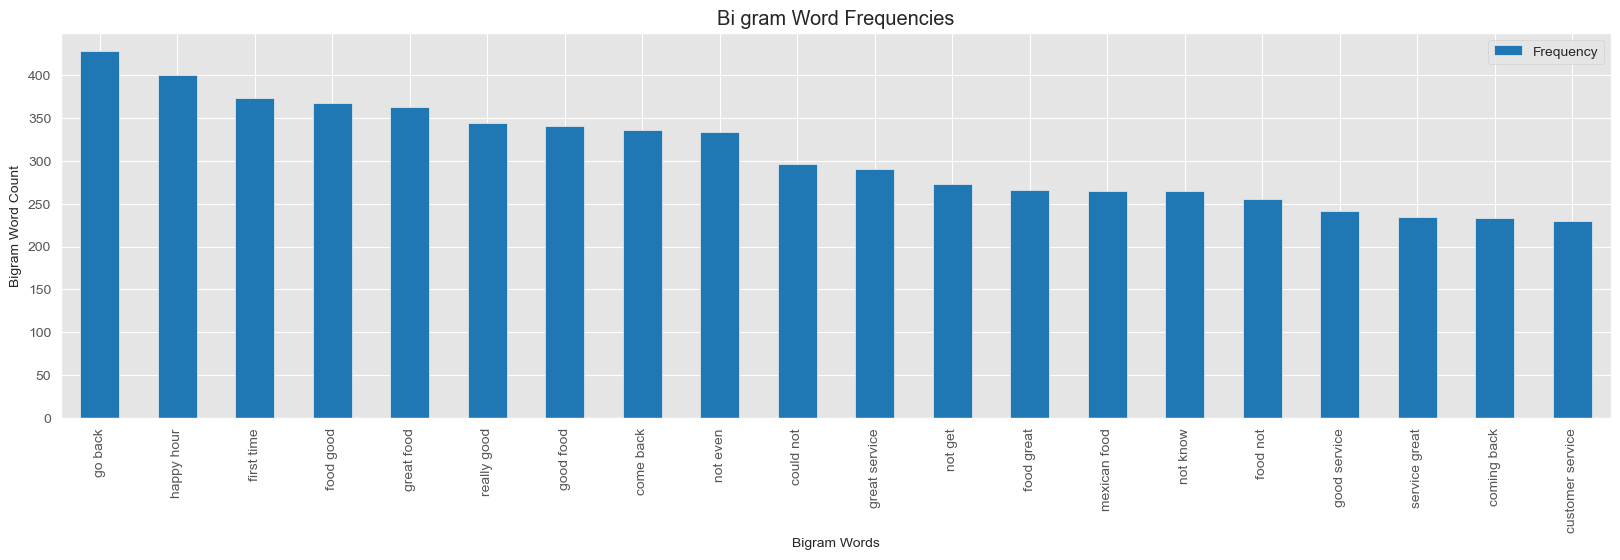

In [76]:
## Calling the above function to calculate the Bi-gram word frequencies of the reviews
word_df1, vectors = bigram_wordfreqplot(business_ratings_lb2["text"])
## Calling the above function to plot the bar plot of top bigram words of reviews
plot_barchart(word_df1,x = "Bigram Words", y = "Bigram Word Count", z = "Bi gram Word Frequencies")

In [77]:
## This function is to calculate and plot bivaraite histograms
def plot_vi(data_visual,d,e,x,y,z,t):
    vis1 = data_visual.loc[data_vi['Target_sentiment'] == 1, z]
    vis2 = data_visual.loc[data_vi['Target_sentiment'] == 0, z]


    ## Plot histogram for distribution of the reviews
    fig, ax = plt.subplots(figsize=(10,5))
    plt.hist(vis1, bins=50, color = "tab:blue", label = d);
    plt.hist(vis2, bins=50, color = "tab:cyan", label = e);
    plt.legend(loc='upper right')
    ax.set_title(t)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [78]:
## This function is to calculate and plot bivaraite barcharts
def plot_words_unigram_and_bigram(index1,index2,freq1,freq2,t,a,b):
    f, ax= plt.subplots(2,2,figsize=(15,5))
    ax = plt.subplot(111)

    ## Plot bi variate barcharts for the reviews
    ax.bar(index1,freq1, width=0.5, color='tab:blue', align='center', label = "Words in postive reviews ")
    ax.bar(index2,freq2, width=0.5, color='tab:cyan', align='center', label = "words in negative reviews")
    plt.xticks(rotation=90)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(t)
    plt.legend()

    plt.show()

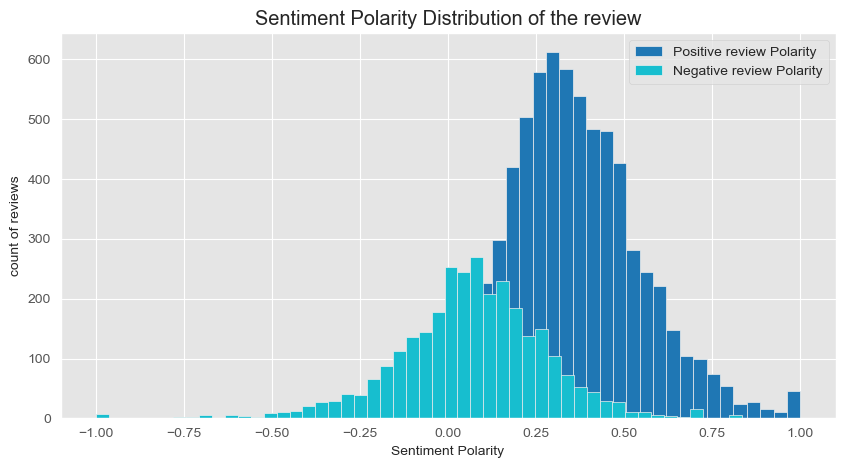

In [79]:
## Calling the above function to plot the histogram of the sentiment polarity for both postive and negative reviews
plot_vi(data_vi, d = "Positive review Polarity", e = "Negative review Polarity", x = "Sentiment Polarity", y = "count of reviews",z='sentiment_polarity', t = 'Sentiment Polarity Distribution of the review')

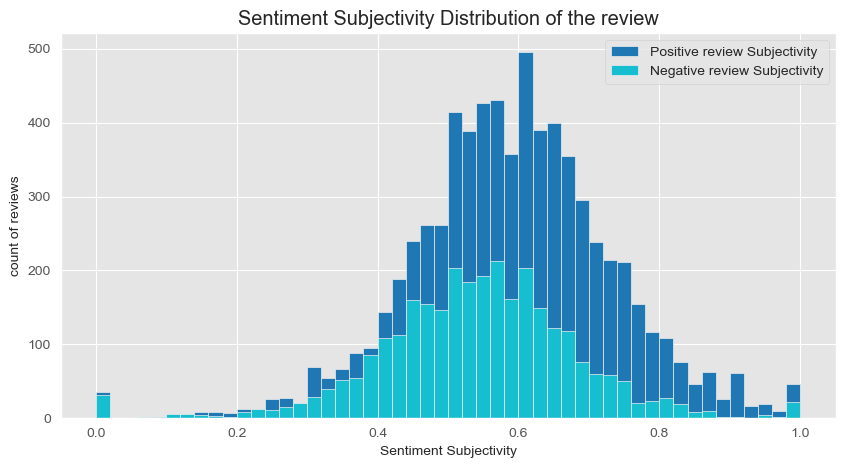

In [80]:
## Calling the above function to plot the histogram of the sentiment subjectivity for both postive and negative reviews
plot_vi(data_vi, d = "Positive review Subjectivity", e = "Negative review Subjectivity", x = "Sentiment Subjectivity", y = "count of reviews",z='sentiment_subjectivity', t = 'Sentiment Subjectivity Distribution of the review')

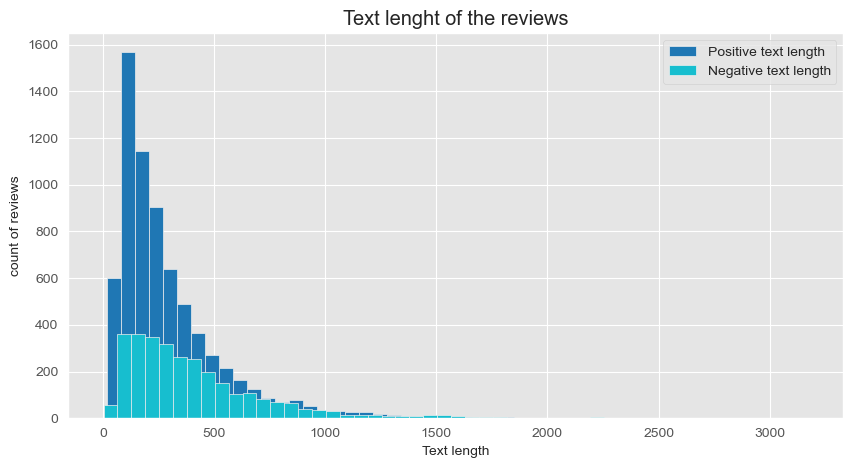

In [81]:
## Calling the above function to plot tbe text length for both postive and negative reviews
plot_vi(data_vi,d = "Positive text length", e = "Negative text length",x = "Text length", y = "count of reviews", z='text_length', t = "Text lenght of the reviews")

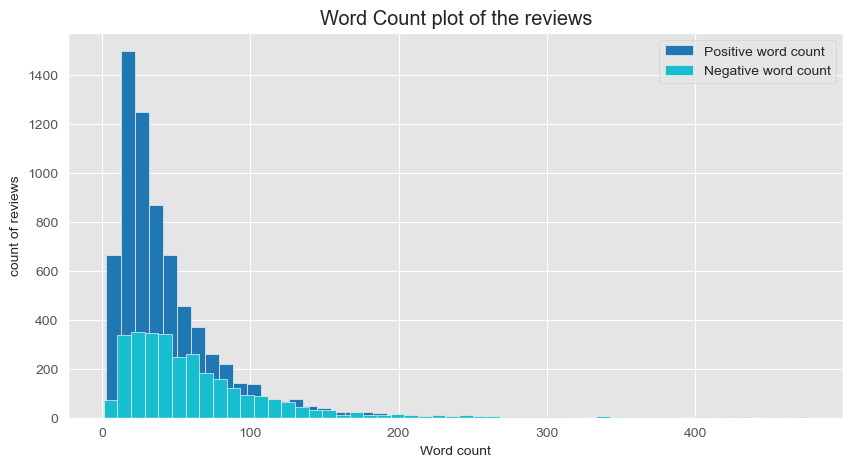

In [82]:
## Calling the above function to plot tbe word count for both postive and negative reviews
plot_vi(data_vi,d = "Positive word count", e = "Negative word count",x = "Word count", y = "count of reviews", z='Word_count', t = "Word Count plot of the reviews")

In [83]:
## Separting the postive and negative reviews and getting the unigram words and their frequencies
word_vis1 = plot_wordfrequencies(data_vi.loc[data_vi['Target_sentiment'] == 1, "text"])
word_vis2 = plot_wordfrequencies(data_vi.loc[data_vi['Target_sentiment'] == 0, "text"])

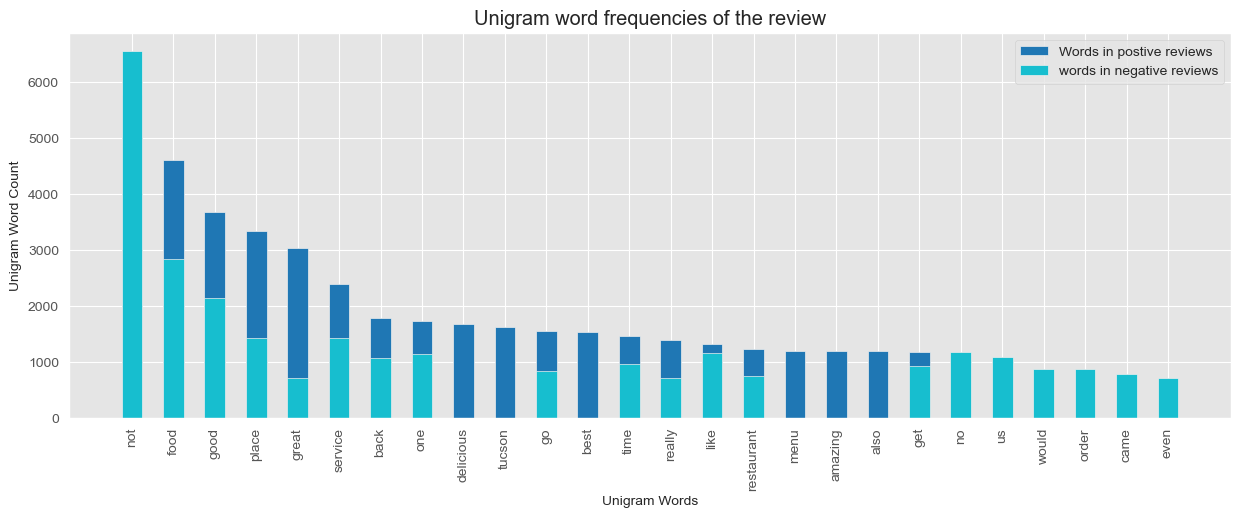

In [84]:
## Calling the above function to plot the bar chart of unigram words for both positive and negative reviews
plot_words_unigram_and_bigram(word_vis1.index,word_vis2.index,word_vis1["Frequency"],word_vis2["Frequency"], t = "Unigram word frequencies of the review", a="Unigram Words", b="Unigram Word Count")

In [85]:
## Separting the postive and negative reviews and getting the bigram words and their frequencies
word_vis4, word_vis4_df  = bigram_wordfreqplot(data_vi.loc[data_vi['Target_sentiment'] == 1, "text"])
word_vis5, word_vis5_df = bigram_wordfreqplot(data_vi.loc[data_vi['Target_sentiment'] == 0, "text"])

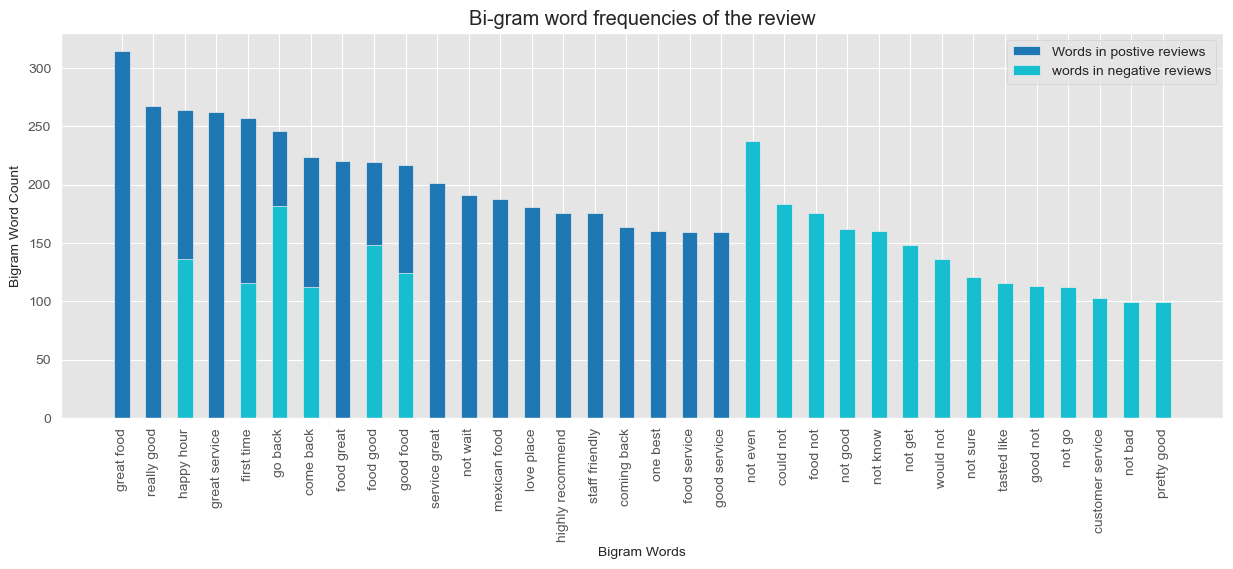

In [86]:
## Calling the above function to plot the bar chart of biigram words for both positive and negative reviews
plot_words_unigram_and_bigram(word_vis4.index,word_vis5.index,word_vis4["Frequency"],word_vis5["Frequency"], t = "Bi-gram word frequencies of the review",  a="Bigram Words", b="Bigram Word Count")

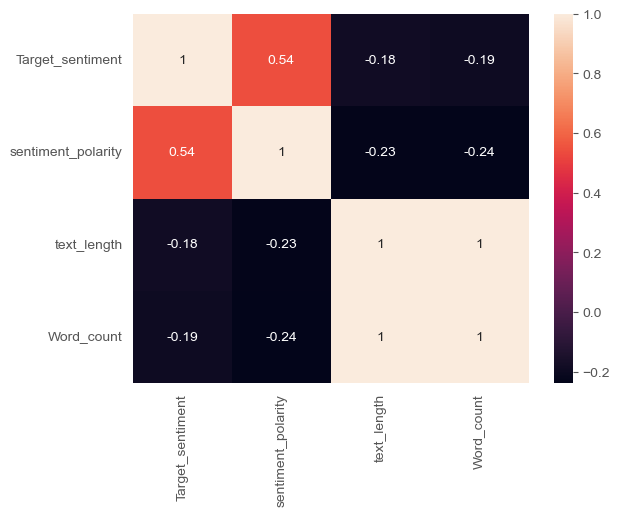

In [87]:
##Correlation Matrix
def matrix(data_vi):
    columns_to_correlate = ["Target_sentiment", "sentiment_polarity", "text_length", "Word_count"]
    data_subset = data_vi[columns_to_correlate]
    matrix_corr = data_subset.corr()
    sns.heatmap(matrix_corr, annot=True)
    plt.show()
matrix(data_vi)

## 4.0 Data Modelling

In [88]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import operator
import sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import spacy

In [89]:
## This code is for spliting the data for train, dev and test set
X_train, X_test, y_train, y_test = train_test_split(data_vi.drop(columns = ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                                                                            'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
                                                                            'attributes', 'categories', 'hours', 'review_id', 'user_id', 'useful',
                                                                            'funny', 'cool', 'date', 'customer_exp', 'length',
                                                                            'Target_sentiment', 'sentiment_polarity','Word_count'], axis = 1), business_ratings_lb2["Target_sentiment"],
                                                    test_size = 0.2, random_state = 40, stratify = business_ratings_lb2["Target_sentiment"] )

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.2, random_state = 40, stratify = y_train)

In [90]:
print("Shape of the train set:", X_train.shape, y_train.shape)
print("Shape of the dev set:", X_dev.shape, y_dev.shape)
print("shape of the test set:", X_test.shape, y_test.shape )

Shape of the train set: (6400, 3) (6400,)
Shape of the dev set: (1600, 3) (1600,)
shape of the test set: (2000, 3) (2000,)


## 4.1 Feature Engineering

4.1.1 Term Frequency - Inverse document frequency feature

In [91]:
## Function for creating tf-idf vectors from text

def tfidf_vec(train,dev,test):
    vectorizer = TfidfVectorizer(ngram_range=(2,2),max_features = 3000)
    vectorizer.fit(train['text'].values)

    X_train_reviews_tfidf = vectorizer.transform(train['text'].values)
    X_dev_reviews_tfidf = vectorizer.transform(dev['text'].values)
    X_test_reviews_tfidf = vectorizer.transform(test['text'].values)

    print("After vectorizations")
    print(X_train_reviews_tfidf.shape)
    print(X_dev_reviews_tfidf.shape)
    print(X_test_reviews_tfidf.shape)
    print("="*100)
    return(X_train_reviews_tfidf,X_dev_reviews_tfidf,X_test_reviews_tfidf )

4.1.2 Spacy feature

In [92]:
## Function for converting text in to spacy vectors
def spacy_text(data, limit=3000):
    """
    Returns a dataframe representation of spacy Vectors
    """
    ## Loading the Spacy Vectors
    nlp = spacy.load('en_core_web_lg')
    spacy_vec = []
    for text in tqdm(data["text"]):
        vec = np.zeros(300)
        word_count = 0
        for word in text.split():
            ## Converting each word in to vectors
            token = nlp(word)
            ## Adding the  word vectors of each sentence
            vec = vec + token.vector
            word_count = word_count + 1
        if word_count != 0:
            f = []
            for i in vec:
                ## Taking the average of the vectors based on the word count
                f.append(i/word_count)
        spacy_vec.append(f)
    X = pd.DataFrame(columns = ['q1'])
    X['q1'] = list(spacy_vec)
    df1 = pd.DataFrame(X.q1.values.tolist(), index= X.index)
    return(spacy_vec,df1)

4.1.3 Numerical Feature

In [93]:
## Function for performing standarization on the numerical feature

def standarizing_numerical(train,dev,test):
    normaliser = Normalizer()
    normaliser.fit(train['text_length'].values.reshape(-1,1))


    X_train_text_len_stand = normaliser.transform(train['text_length'].values.reshape(-1,1))
    X_dev_text_len_stand = normaliser.transform(dev['text_length'].values.reshape(-1,1))
    X_test_text_len_stand = normaliser.transform(test['text_length'].values.reshape(-1,1))
    print("After Normalization")
    print(X_train_text_len_stand.shape)
    print(X_dev_text_len_stand.shape)
    print(X_test_text_len_stand.shape)
    print("="*100)

    return(X_train_text_len_stand,X_dev_text_len_stand, X_test_text_len_stand)

In [94]:
## Calling the above tfidf_vec function to create 3000 dimensional bigram feature
X_train_reviews_tfidf,X_dev_text_len_stand_tfidf,X_test_reviews_tfidf = tfidf_vec(X_train,X_dev,X_test)

After vectorizations
(6400, 3000)
(1600, 3000)
(2000, 3000)


In [95]:
## Calling the above function spacy_text to create spacy vector feature
X_train_reviews_spacy, X_df_train_reviews_spacy = spacy_text(X_train,limit=3000)
X_dev_reviews_spacy, X_df_dev_reviews_spacy = spacy_text(X_dev, limit=3000)
X_test_reviews_spacy, X_df_test_reviews_spacy = spacy_text(X_test, limit=3000)

100%|██████████| 2000/2000 [03:56<00:00,  8.45it/s]


In [88]:


#!python -m spacy download en_core_web_lg

In [96]:
X_df_train_reviews_spacy.head(2)

0         1         2         3         4         5         6    \
0 -0.320489  0.597856 -2.005763 -0.079427  1.861233  0.682313  0.871235   
1 -0.491767  0.889271 -2.371389  0.416883  1.730155 -0.359825  0.398551   

        7         8         9    ...       290       291       292       293  \
0  2.627114 -0.750056  0.425761  ...  0.654195 -0.476712  1.060872 -0.762464   
1  2.558685 -1.779122  1.107130  ...  0.304738 -0.595210  0.014932 -1.396066   

        294       295       296       297       298       299  
0 -0.809212  0.423452 -0.242274 -0.340062 -1.674549  0.823509  
1 -1.611641 -0.428826 -0.041624  0.067555 -0.958778  0.632126  

[2 rows x 300 columns]

In [97]:
X_df_dev_reviews_spacy.head(2)

0         1         2         3         4         5         6    \
0  0.713742 -1.502376 -3.666881 -0.133975  2.256322 -1.860692  1.030503   
1 -1.031621 -0.149675 -2.436024  0.574116  1.780798 -0.782833  0.694847   

        7         8         9    ...       290       291       292       293  \
0  3.067722 -2.795490  1.101573  ...  0.695259 -0.948610  1.805118 -2.185347   
1  2.516883 -1.402988  0.334801  ...  0.836074 -0.739345  1.453286 -0.803073   

        294       295       296       297       298       299  
0 -1.776372 -1.988749 -0.602516  1.033480 -3.468800  1.693698  
1 -1.276525 -0.049045  0.152851 -0.412044 -1.641326  0.570792  

[2 rows x 300 columns]

In [98]:
X_df_test_reviews_spacy.head(2)

0         1         2         3         4         5         6    \
0 -0.706730  0.723264 -2.490303  0.091003  1.718319 -0.483339  0.480980   
1 -0.247563 -0.897997 -2.812299  0.345500  2.607593 -1.111923  1.167129   

        7         8         9    ...       290       291       292       293  \
0  3.720665 -2.136536  0.647793  ...  0.428084 -1.426074  1.074606 -1.020753   
1  2.913786 -2.260812  2.070637  ...  1.259992 -0.931810  1.408270 -1.881521   

        294       295       296       297       298       299  
0 -1.049466 -0.942398 -0.097045 -0.343023 -2.461096  1.025289  
1 -1.539061 -0.560038 -0.085978  0.304871 -1.659479  1.115062  

[2 rows x 300 columns]

In [99]:
## calling the above function to normalise the numerical feature text length
X_train_text_len_stand,X_dev_text_len_stand, X_test_text_len_stand = standarizing_numerical(X_train,X_dev,X_test)

After Normalization
(6400, 1)
(1600, 1)
(2000, 1)


In [100]:
## Fuction for merging textual vectors and numerical feature
def merging(train1,train2,dev1,dev2,test1,test2,tx):
    train_datam = hstack((train1,train2)).tocsr()
    dev_datam = hstack((dev1,dev2)).tocsr()
    test_datam = hstack((test1,test2 )).tocsr()


    print(tx +"final data matrix developed")
    print(train_datam.shape)
    print(dev_datam.shape)
    print(test_datam.shape)
    print("="*100)

    return(train_datam,dev_datam,test_datam)

In [101]:
###### Calling the above function to merge tfidf vectors and numerical text length feature
train_data_tfidf, dev_data_tfidf, test_data_tfidf = merging(X_train_reviews_tfidf,X_train_text_len_stand,X_dev_text_len_stand_tfidf,X_dev_text_len_stand,X_test_reviews_tfidf, X_test_text_len_stand,tx = "TFIDF ",)

TFIDF final data matrix developed
(6400, 3001)
(1600, 3001)
(2000, 3001)


In [102]:
# Concatenate spaCy vectors and numerical features along columns (axis=1)
train_data_spacy = pd.concat([X_df_train_reviews_spacy, pd.DataFrame(X_train_text_len_stand, columns=['text_length'])], axis=1)
dev_data_spacy = pd.concat([X_df_dev_reviews_spacy, pd.DataFrame(X_dev_text_len_stand, columns=['text_length'])], axis=1)
test_data_spacy = pd.concat([X_df_test_reviews_spacy, pd.DataFrame(X_test_text_len_stand, columns=['text_length'])], axis=1)

# Optional: Print the shape of the resulting DataFrames
print("Train Data Shape:", train_data_spacy.shape)
print("Dev Data Shape:", dev_data_spacy.shape)
print("Test Data Shape:", test_data_spacy.shape)

Train Data Shape: (6400, 301)
Dev Data Shape: (1600, 301)
Test Data Shape: (2000, 301)


In [103]:
#### Function for evaluating models

def evaluate(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test,y_test_pred)
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of confusion matrix for Test data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    print("Precision Score of the model:", precision_score(y_test,y_pred)*100)
    print("Recall Score of the model:", recall_score(y_test,y_pred)*100)
    print("Acuracy score of the model:",accuracy_score(y_test,y_pred)*100)
    print("F1 score of the model:",f1_score(y_test,y_pred)*100)


## 4.2 Modelling

## 4.2.1 Baseline Models with features TFIDF and Reviews Length

#### 1. Multinomial Naive Bayes with default parameter-> Baseline

In [104]:
## Initilizaing multinomial naive bayes model and fitting the train data
model =  MultinomialNB()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 82.98906439854193
Recall Score of the model: 97.71101573676681
Acuracy score of the model: 84.39999999999999
F1 score of the model: 89.75032851511169


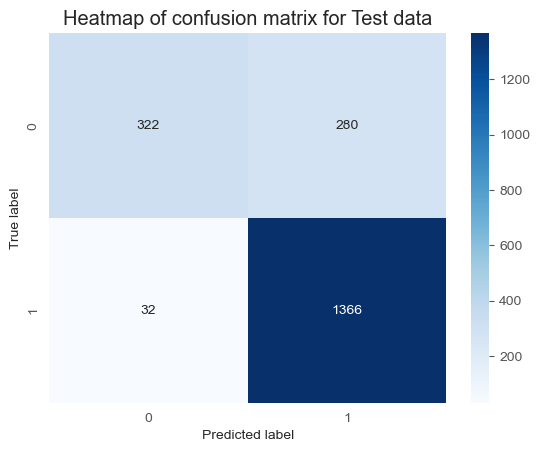

In [105]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 2.  Decision Tree with default parameter-> Baseline

In [106]:
## Initilizaing decision tree classifier and fitting the train data
model = DecisionTreeClassifier()
model = model.fit(train_data_tfidf,y_train)

Precision Score of the model: 80.64285714285714
Recall Score of the model: 80.758226037196
Acuracy score of the model: 73.0
F1 score of the model: 80.70050035739814


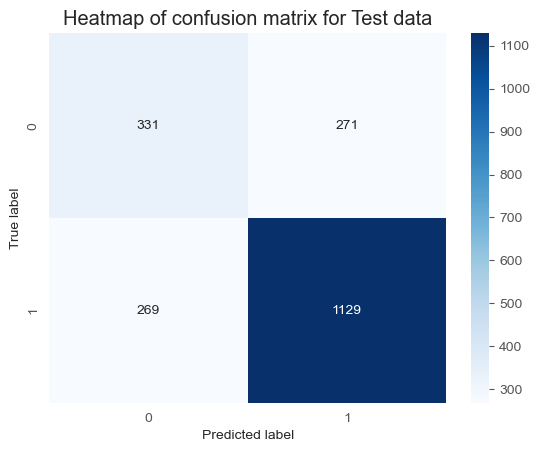

In [107]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 3. Support Vector Machine with default parameter -> Baseline

In [108]:
## Initilizaing support vector classifier and fitting the train data
model = svm.SVC()
model = model.fit(train_data_tfidf,y_train)

Precision Score of the model: 82.21271393643032
Recall Score of the model: 96.20886981402002
Acuracy score of the model: 82.8
F1 score of the model: 88.66183256427159


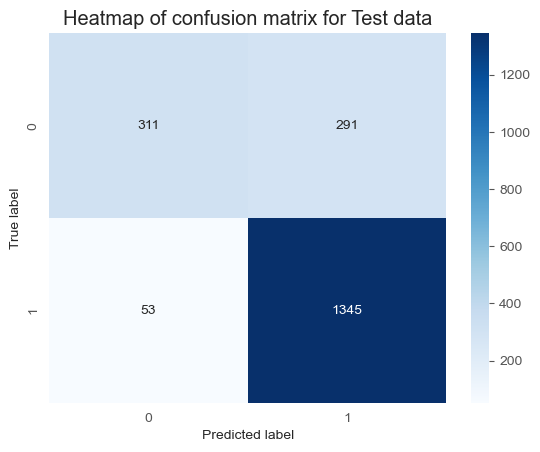

In [109]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 4. Random Forest with default parameters -> Baseline

In [110]:
## Initilizaing random forest classifier and fitting the train data
model =  RandomForestClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 83.28877005347593
Recall Score of the model: 89.12732474964234
Acuracy score of the model: 79.9
F1 score of the model: 86.10919143054595


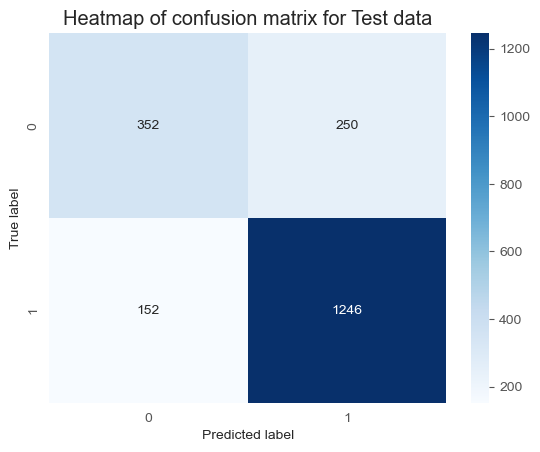

In [111]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 5. XGBoost Classifier with default parameters -> Baseline

In [112]:
## Initilizaing XGBoost Classifier and fitting the train data
model = XGBClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 80.75980392156863
Recall Score of the model: 94.27753934191702
Acuracy score of the model: 80.30000000000001
F1 score of the model: 86.99669966996699


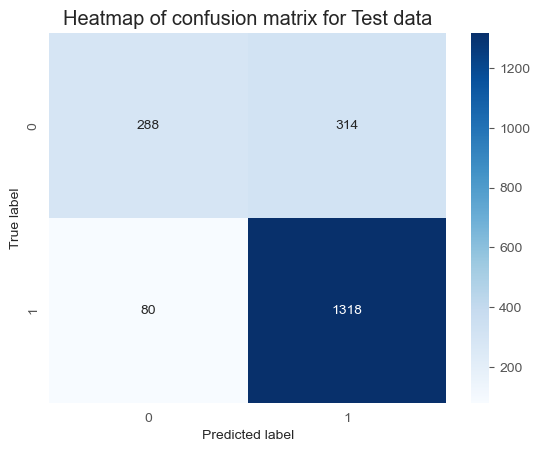

In [113]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 6. Gradient Boosting Classifier with default parameters -> Baseline

In [114]:
## Initilizaing Gradient Boosting Classifier and fitting the train data
model = GradientBoostingClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 75.8869179600887
Recall Score of the model: 97.92560801144492
Acuracy score of the model: 76.8
F1 score of the model: 85.50905683947533


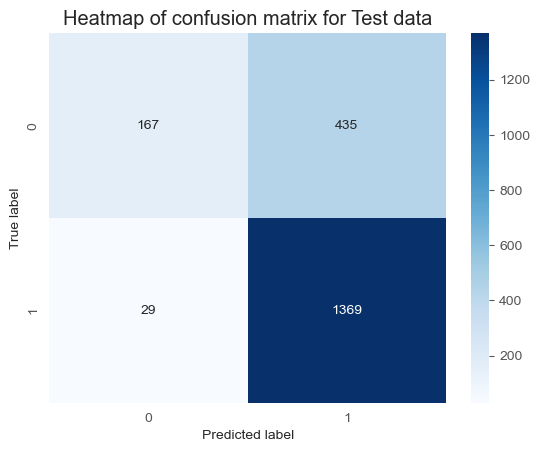

In [115]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

#### 7. Multilayer Perceptron Classifier with default parameters -> Baseline

In [116]:
## Initilizaing Multilayer Perceptron Classifier and fitting the train data
model = MLPClassifier()
model = model.fit(train_data_tfidf, y_train)

Precision Score of the model: 84.94699646643109
Recall Score of the model: 85.97997138769671
Acuracy score of the model: 79.55
F1 score of the model: 85.46036260220406


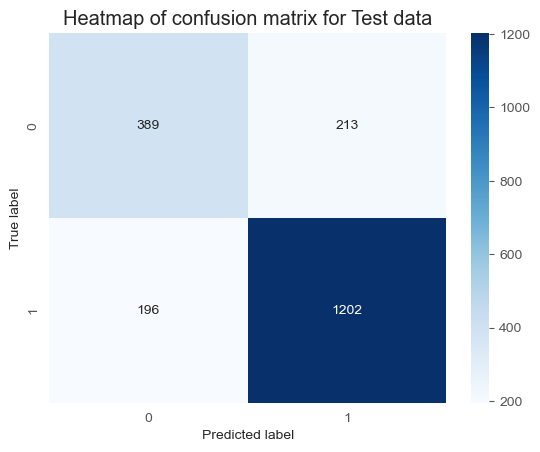

In [117]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred )

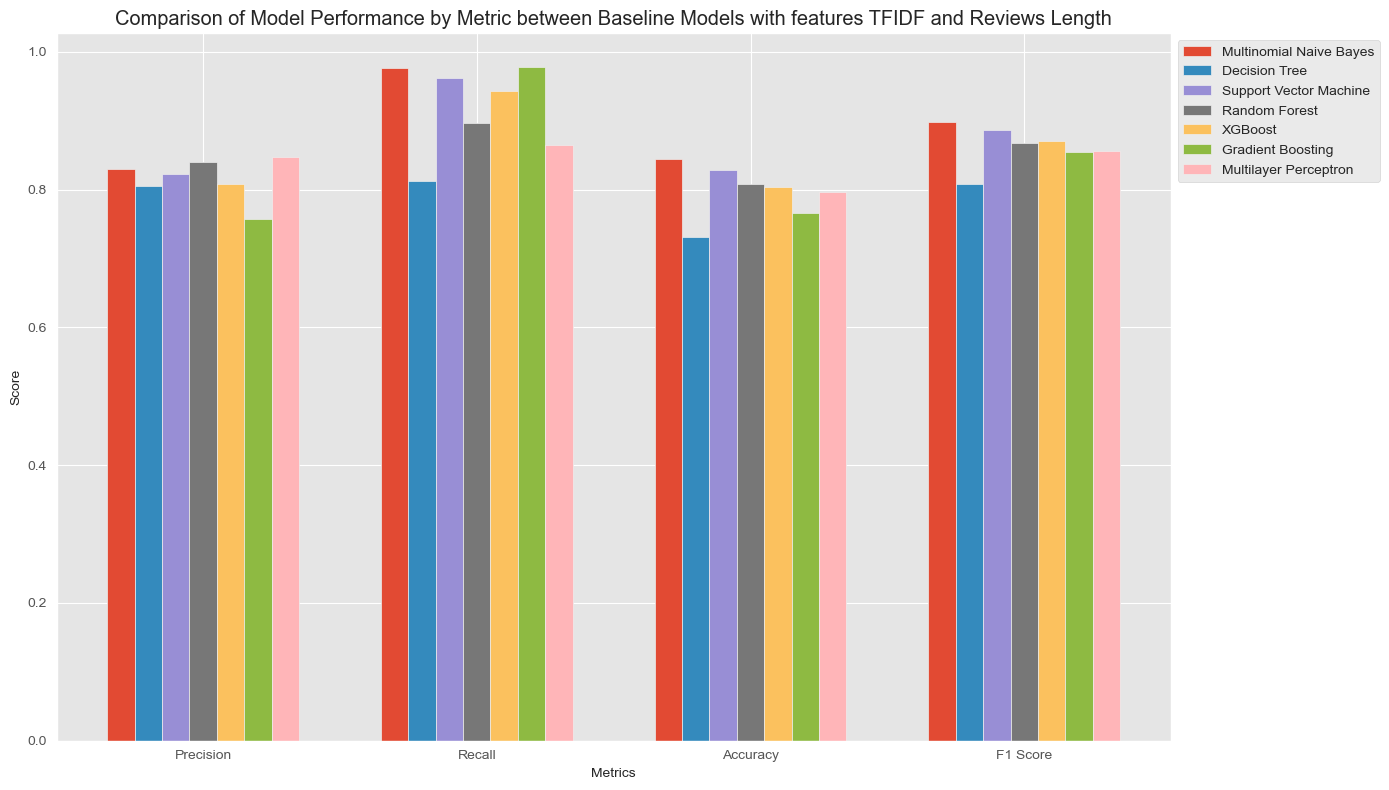

                     Model  Precision    Recall  Accuracy  F1 Score
0  Multinomial Naive Bayes   0.829891  0.977110     0.844  0.897503
1            Decision Tree   0.804533  0.812589     0.731  0.808541
2   Support Vector Machine   0.822127  0.962089     0.828  0.886618
3            Random Forest   0.839812  0.896280     0.808  0.867128
4                  XGBoost   0.807598  0.942775     0.803  0.869967
5        Gradient Boosting   0.757761  0.977825     0.766  0.853841
6    Multilayer Perceptron   0.847125  0.864092     0.796  0.855524


In [118]:
#Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1 Score"])

# Define models and their hyperparameters
models = [
    {
        "name": "Multinomial Naive Bayes",
        "model": MultinomialNB(),  # Replace with your best_alpha
        "data": train_data_tfidf
    },
    {
        "name": "Decision Tree",
        "model": DecisionTreeClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "Support Vector Machine",
        "model": svm.SVC(),
        "data": train_data_tfidf
    },
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "XGBoost",
        "model": XGBClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "Gradient Boosting",
        "model": GradientBoostingClassifier(),
        "data": train_data_tfidf
    },
    {
        "name": "Multilayer Perceptron",
        "model": MLPClassifier(),
        "data": train_data_tfidf
    }
]

# Iterate through models, fit, and evaluate
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    train_data = model_info["data"]

    # Fit the model
    model.fit(train_data, y_train)

    # Predict on test data
    y_test_pred = model.predict(test_data_tfidf)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results to the DataFrame
    results_df = results_df.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "F1 Score": f1
    }, ignore_index=True)


# Set the bar width for separation between metrics
bar_width = 0.1

# Create a grouped bar chart
metrics = ["Precision", "Recall", "Accuracy", "F1 Score"]
n_metrics = len(metrics)
n_models = len(models)
x = np.arange(n_metrics)

plt.figure(figsize=(14, 8))
for i, model_info in enumerate(models):
    model_name = model_info["name"]
    metrics_values = [results_df.loc[results_df["Model"] == model_name, metric].values[0] for metric in metrics]
    plt.bar(x + (i - (n_models - 1) / 2) * bar_width, metrics_values, width=bar_width, label=model_name)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Performance by Metric between Baseline Models with features TFIDF and Reviews Length")
plt.xticks(x, metrics)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Display the results DataFrame
print(results_df)



## 4.2.2 Oversampling Models with features TFIDF and Reviews Length

In [119]:
## Oversampling the train dataset using RandomOver sampler of Imblearn library
def oversampling(train_s,y_trains):
    ros = RandomOverSampler(random_state=0)
    train_data1, y_train1 = ros.fit_resample(train_s, y_trains)
    return(train_data1, y_train1)

In [120]:
## Calling the above function to oversample the train dataset with tfidf and text length feature
train_data1_tfidf,y_train1_tfidf = oversampling(train_data_tfidf,y_train)

In [121]:
## Gridsearch cross validation hyperparameter tuning
def hyper_tuning(t_d,y_t,alpha,parameters):
    clf = GridSearchCV(alpha, param_grid= parameters, cv=5, scoring='f1',return_train_score= True)
    hyper = clf.fit(t_d,y_t)
    print("Best parameters for the algorithm", hyper.best_estimator_)
    print("Best cross validation score :", hyper.best_score_)
    return(hyper.best_estimator_)

#### 1. Multinomial Naive Bayes with oversampling of the train dataset and hyperparameter tuning

In [122]:
## Calling the above function for tuning multinomial naive bayes algorithm using gridsearch cv then fitting the train dataset with best parameter
model =  hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha = MultinomialNB(fit_prior=True, class_prior=None),parameters = {'alpha':[1000,500,100,50,10,5,0.5,1, 0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]})
model = model.fit(train_data1_tfidf, y_train1_tfidf)

Best parameters for the algorithm MultinomialNB(alpha=0.05)
Best cross validation score : 0.8583294200840778


Precision Score of the model: 87.71551724137932
Recall Score of the model: 87.33905579399142
Acuracy score of the model: 82.6
F1 score of the model: 87.52688172043011


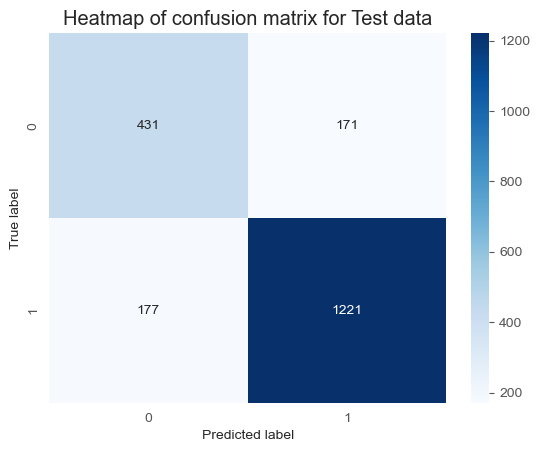

In [123]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred)

#### 2. Decision Tress with oversampling of the train dataset and hyperparameter tuning

In [124]:
## Calling the above function for tuning decision tree classifier using gridsearch cv then fitting the train dataset with best parameter
model =  hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha = DecisionTreeClassifier(),parameters = {"max_features":[1,2,3,4,5],"max_depth":[int(x) for x in range(10)],"min_samples_leaf":[1,2,3,4,5],"min_samples_split":[1,2,3,4,5],"criterion":["gini","entropy"]})
model = model.fit(train_data1_tfidf, y_train1_tfidf)

Best parameters for the algorithm DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_leaf=4)
Best cross validation score : 0.6758267863440224


Precision Score of the model: 70.33855482566953
Recall Score of the model: 99.57081545064378
Acuracy score of the model: 70.35
F1 score of the model: 82.44003553449808


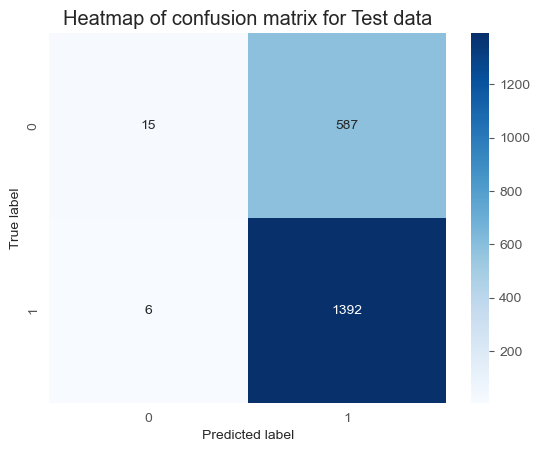

In [125]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred)


#### 3. Support Vector Machine with oversampling of the train dataset and hyperparameter tuning

In [126]:
## Calling the above function for tuning Support vector classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
model = hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha =  SGDClassifier(loss = 'hinge'),parameters = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],'penalty' :[ 'l2','l1'],'max_iter':[20]})
model = model.fit(train_data1_tfidf, y_train1_tfidf)

Best parameters for the algorithm SGDClassifier(max_iter=20)
Best cross validation score : 0.8645198279988966


Precision Score of the model: 86.38297872340426
Recall Score of the model: 87.1244635193133
Acuracy score of the model: 81.39999999999999
F1 score of the model: 86.75213675213676


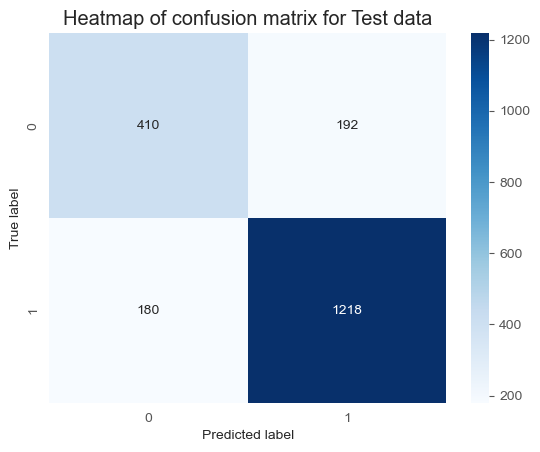

In [127]:
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_tfidf)
evaluate(y_test,y_test_pred)

#### 4. Random Forest with oversampling of the train dataset and hyperparameter tuning

In [128]:
## Calling the above function for tuning Random Forest classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
#model = hyper_tuning(train_data1_tfidf,y_train1_tfidf,alpha =  RandomForestClassifier(n_jobs = -1),parameters = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4]})
#model = model.fit(train_data1_tfidf, y_train1_tfidf)

In [116]:
## prediction on the test dataset and then evalauting the model performance
#y_test_pred = model.predict(test_data_tfidf)
#evaluate(y_test,y_test_pred)

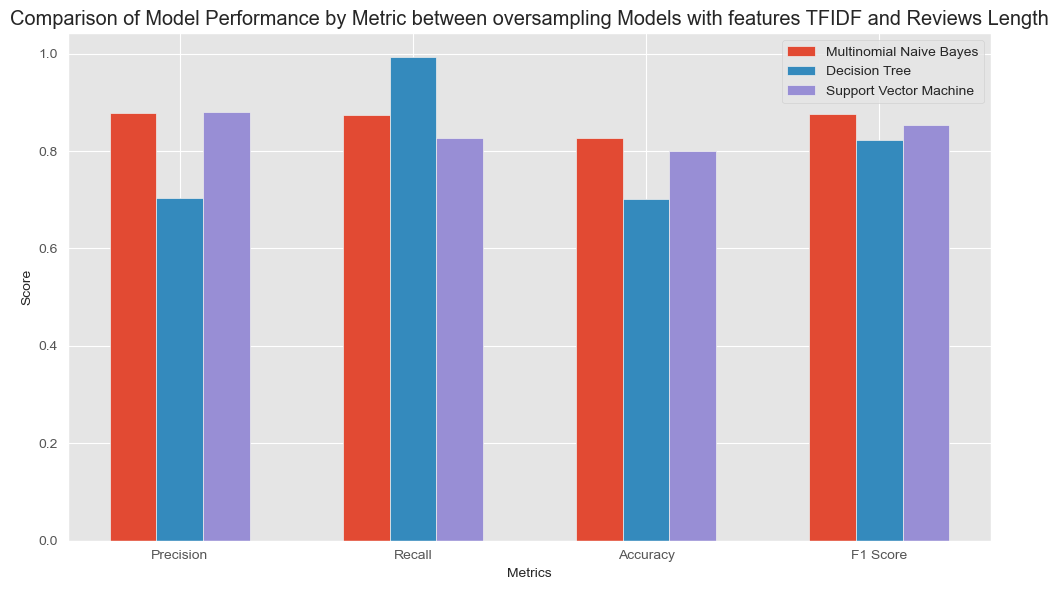

                     Model  Precision    Recall  Accuracy  F1 Score
0  Multinomial Naive Bayes   0.877155  0.873391    0.8260  0.875269
1            Decision Tree   0.702990  0.992132    0.7015  0.822901
2   Support Vector Machine   0.880518  0.827611    0.8010  0.853245


In [136]:
# Create an empty DataFrame to store the results
results_df1 = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1 Score"])

# Define models and their hyperparameters
models = [
    {
        "name": "Multinomial Naive Bayes",
        "model": MultinomialNB(alpha=0.05),  # Replace with your best_alpha
        "data": train_data1_tfidf
    },
    {
        "name": "Decision Tree",
        "model": DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=4),
        "data": train_data1_tfidf
    },
    {
        "name": "Support Vector Machine",
        "model": SGDClassifier(alpha=0.01, max_iter=20),
        "data": train_data1_tfidf
    }
]

# Iterate through models, fit, and evaluate
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    train_data = model_info["data"]

    # Fit the model
    model.fit(train_data, y_train1_tfidf)

    # Predict on test data
    y_test_pred = model.predict(test_data_tfidf)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results to the DataFrame
    results_df1 = results_df1.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "F1 Score": f1
    }, ignore_index=True)

# Set the bar width for separation between metrics
bar_width = 0.2

# Create a grouped bar chart
metrics = ["Precision", "Recall", "Accuracy", "F1 Score"]
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
for i, model_info in enumerate(models):
    model_name = model_info["name"]
    metrics_values = [results_df1.loc[results_df1["Model"] == model_name, metric].values[0] for metric in metrics]
    plt.bar(x + i * bar_width, metrics_values, width=bar_width, label=model_name)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Performance by Metric between oversampling Models with features TFIDF and Reviews Length")
plt.xticks(x + bar_width, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Display the results DataFrame
print(results_df1)



## 4.2.3 Oversampling Models with features Spacy and Reviews Length

In [137]:
# Convert column names to strings
train_data_spacy.columns = train_data_spacy.columns.astype(str)

# Call the oversampling function
train_data1_spacy, y_train1_spacy = oversampling(train_data_spacy, y_train)

####  1. Support Vector Machine with oversampling of the train dataset and hyperparameter tuning

In [138]:
## Calling the above function for tuning Support vector classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
model = hyper_tuning(train_data1_spacy,y_train1_spacy,alpha =  SGDClassifier(loss = 'hinge'),parameters = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],'penalty' :[ 'l2','l1'],'max_iter':[20]})
model = model.fit(train_data1_spacy, y_train1_spacy)

Best parameters for the algorithm SGDClassifier(alpha=0.01, max_iter=20)
Best cross validation score : 0.8560164899581568


Precision Score of the model: 92.17456734386758
Recall Score of the model: 87.62517882689556
Acuracy score of the model: 86.15
F1 score of the model: 89.84231756508984


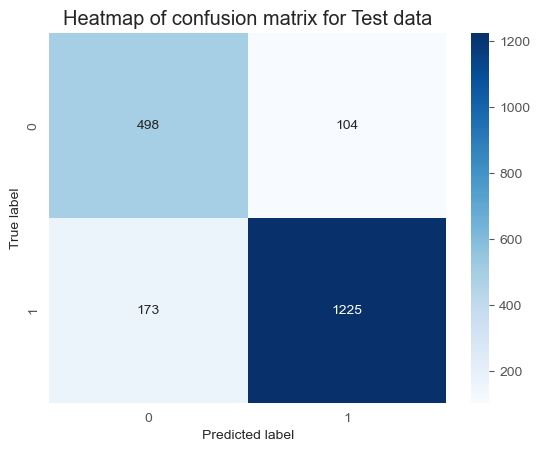

In [139]:
# Convert column names to strings
test_data_spacy.columns = test_data_spacy.columns.astype(str)
## prediction on the test dataset and then evalauting the model performance
y_test_pred = model.predict(test_data_spacy)
evaluate(y_test,y_test_pred)

#### 2. Random Forest with oversampling of the train dataset and hyperparameter tuning

In [140]:
## Calling the above function for tuning Random forest classifier algorithm using gridsearch cv then fitting the train dataset with best parameter
#model = hyper_tuning(train_data1_spacy,y_train1_spacy,alpha =  RandomForestClassifier(n_jobs = -1),parameters = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],'min_samples_split':[2,4, 5, 10],'min_samples_leaf':[1, 2, 4]})
#model = model.fit(train_data1_spacy, y_train1_spacy)

In [141]:
## prediction on the test dataset and then evalauting the model performance
#y_test_pred = model.predict(test_data_spacy)
#evaluate(y_test,y_test_pred)

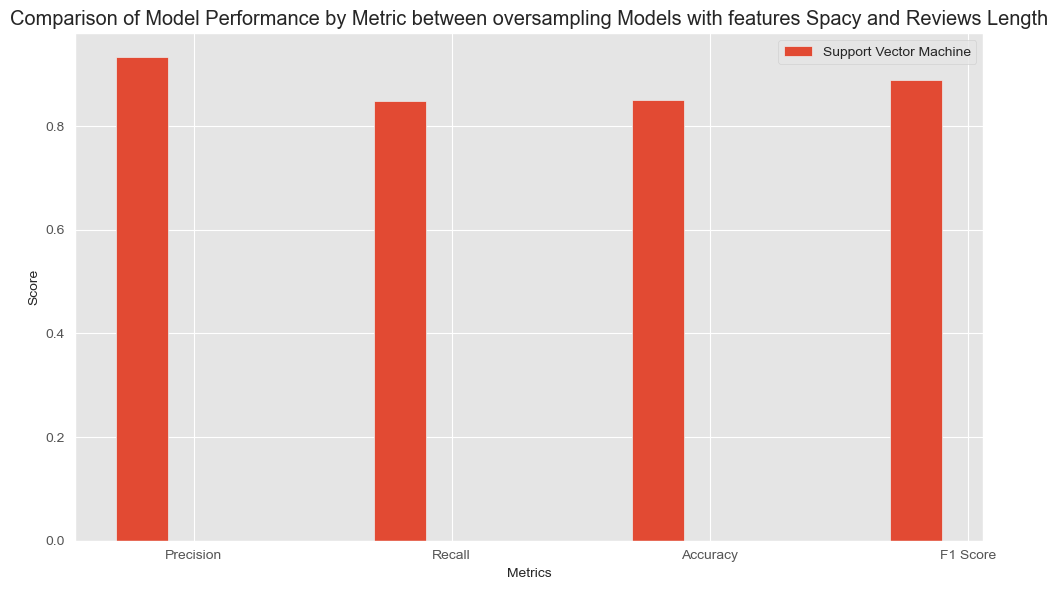

                    Model  Precision    Recall  Accuracy  F1 Score
0  Support Vector Machine    0.93239  0.848355     0.851   0.88839


In [143]:
# Create an empty DataFrame to store the results
results_df2 = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1 Score"])

# Define models and their hyperparameters
models = [
    {
        "name": "Support Vector Machine",
        "model": SGDClassifier(alpha=0.01, max_iter=20),
        "data": train_data1_spacy
    }
]

# Iterate through models, fit, and evaluate
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    train_data = model_info["data"]

    # Fit the model
    model.fit(train_data, y_train1_spacy)

    # Predict on test data
    y_test_pred = model.predict(test_data_spacy)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Append results to the DataFrame
    results_df2 = results_df2.append({
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "F1 Score": f1
    }, ignore_index=True)


# Set the bar width for separation between metrics
bar_width = 0.2

# Create a grouped bar chart
metrics = ["Precision", "Recall", "Accuracy", "F1 Score"]
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
for i, model_info in enumerate(models):
    model_name = model_info["name"]
    metrics_values = [results_df2.loc[results_df2["Model"] == model_name, metric].values[0] for metric in metrics]
    plt.bar(x + i * bar_width, metrics_values, width=bar_width, label=model_name)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Performance by Metric between oversampling Models with features Spacy and Reviews Length")
plt.xticks(x + bar_width, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Display the results DataFrame
print(results_df2)


## 5.0 Time Series Analysis and Weekly Rating Forecast: Holt-Winters' Additive Model

In [144]:
# Import Libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

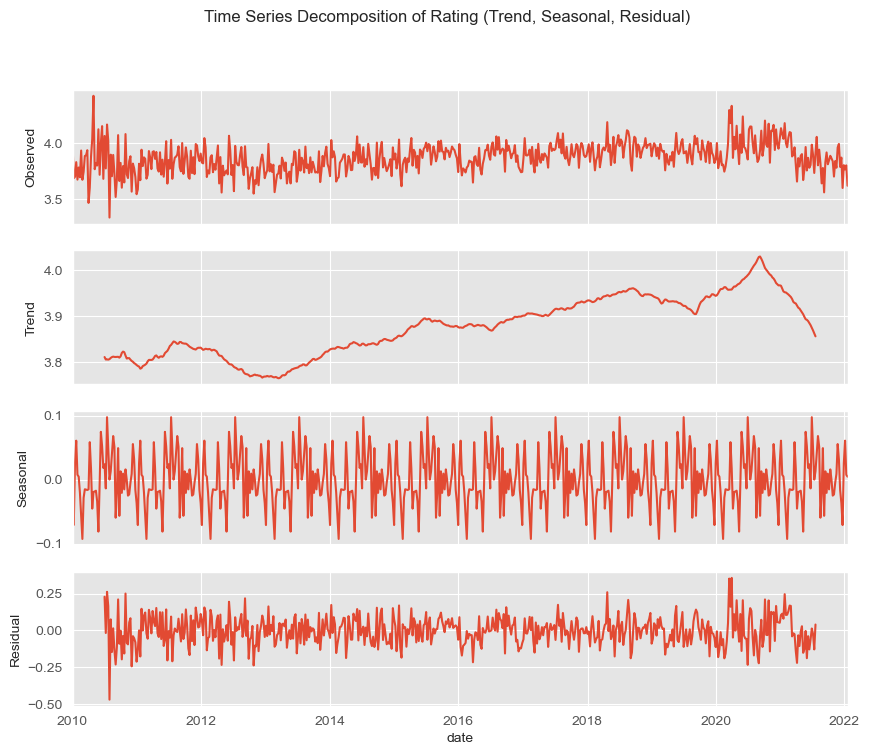

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'date' column is in datetime format, if not, convert it first
business_ratings['date'] = pd.to_datetime(business_ratings['date'])

# Define the given date to start the training set
given_start_date = pd.to_datetime('2010-01-01')  # Change this to your desired start date

# Filter the DataFrame to include data starting from the given date
business_ratings_train = business_ratings[business_ratings['date'] >= given_start_date]

# Create a DataFrame with 'date' and 'stars_y' columns
business_ratings_dt = business_ratings_train[['date', 'stars_y']]

# Set 'date' column as the index
business_ratings_dt.set_index('date', inplace=True)

# Resample to a weekly frequency
business_ratings_date_weekly = business_ratings_dt['stars_y'].resample('W').mean()  # You can choose other aggregation methods

# Handle missing values by filling with the mean
mean_value = business_ratings_date_weekly.mean()
business_ratings_date_weekly.fillna(mean_value, inplace=True)

# Time Series Decomposition (Trend, Seasonal, Residual)
decomposition = seasonal_decompose(business_ratings_date_weekly, model='additive')

# Create separate subplots for trend, seasonal, and residual components
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')

# Set the main title for the entire plot
fig.suptitle("Time Series Decomposition of Rating (Trend, Seasonal, Residual)")
plt.show()


In [147]:
# Augmented Dickey-Fuller Test for Stationarity
result = adfuller(business_ratings_date_weekly.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.187320838788075
p-value: 0.0006922302219139746


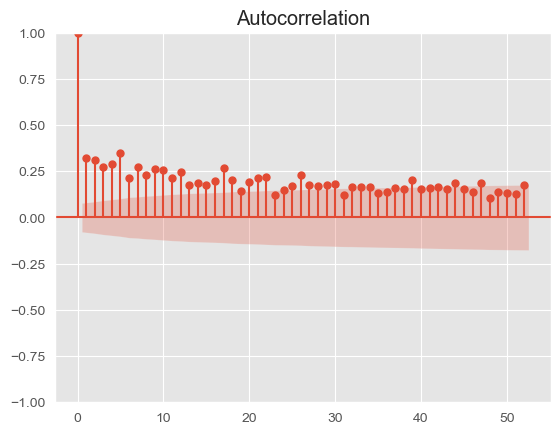

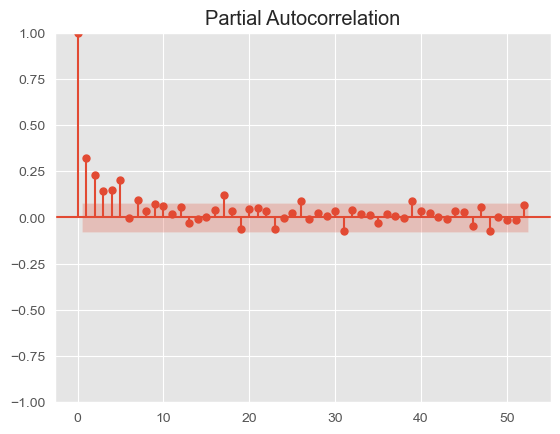

In [148]:
# Autocorrelation and Partial Autocorrelation Plots
plot_acf(business_ratings_date_weekly, lags=52)  # Autocorrelation
plt.show()
plot_pacf(business_ratings_date_weekly, lags=52)  # Partial Autocorrelation
plt.show()

In [149]:
# Forecasting using Holt-Winters Exponential Smoothing
train_size = int(len(business_ratings_date_weekly) * 0.8)  # 80% of data for training
train, test = business_ratings_date_weekly[:train_size], business_ratings_date_weekly[train_size:]

model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52)
model_fit = model.fit()

forecast_period = len(test)
forecast = model_fit.forecast(steps=forecast_period)
forecast

2019-09-01    3.895902
2019-09-08    3.965821
2019-09-15    3.836232
2019-09-22    3.896119
2019-09-29    3.894245
                ...   
2021-12-26    3.843180
2022-01-02    3.937739
2022-01-09    3.966238
2022-01-16    3.919771
2022-01-23    3.926531
Freq: W-SUN, Length: 126, dtype: float64

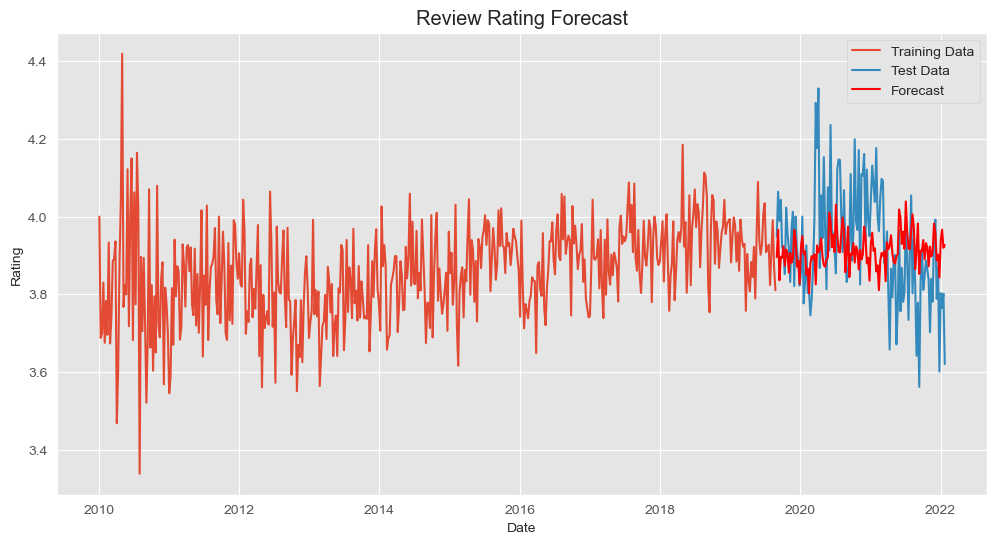

In [150]:
# Plotting the Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Review Rating Forecast')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

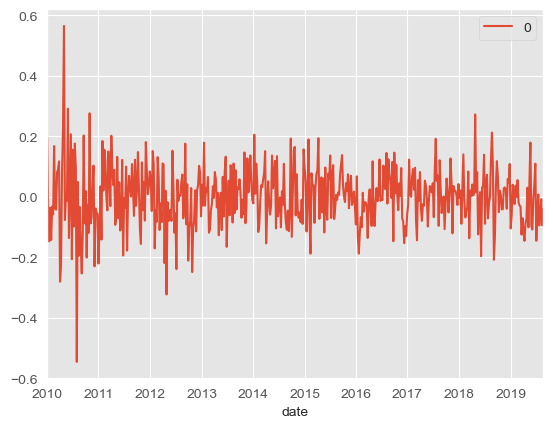

In [151]:
# Plot Residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

In [152]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.11813140869050497
Mean Squared Error (MSE): 0.022291165360564955
Root Mean Squared Error (RMSE): 0.1493022617396165
